In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:

import pandas as pd
df_train=pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:

import pandas as pd
df_test=pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# **Importing Libraries**







In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# **Data Pre-processing**

In [5]:
print("Train Shape" ,df_train.shape)
print('Test Shape',df_test.shape)

Train Shape (1460, 81)
Test Shape (1459, 80)


In [6]:
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df_test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
print('Duplicate Values in train set' ,df_train.duplicated().sum())
print('Duplicate Values in test set' ,df_test.duplicated().sum())

Duplicate Values in train set 0
Duplicate Values in test set 0


# **Further We will Analyze To Find out the below stuff**


*   **Missing Values**
*  **All The Numerical Variables**

*   **All The Numerical Variables**
*  **Distribution of the Numerical Variables**

*   **Categorical Variables**
*  **Cardinality of Categorical Variables**


*   **Outliers**
*   **Relationship between independent and dependent feature(SalePrice)**



## **"Missing Values"**



In [13]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


#### Since they are many missing values, we need to find the relationship between missing values and Sales Price

we will plot some diagram for this relationship


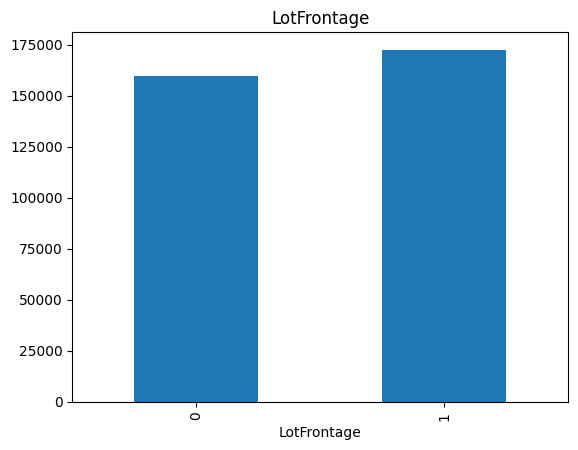

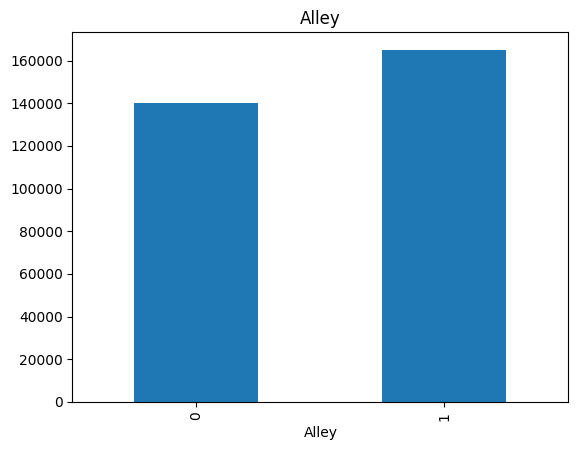

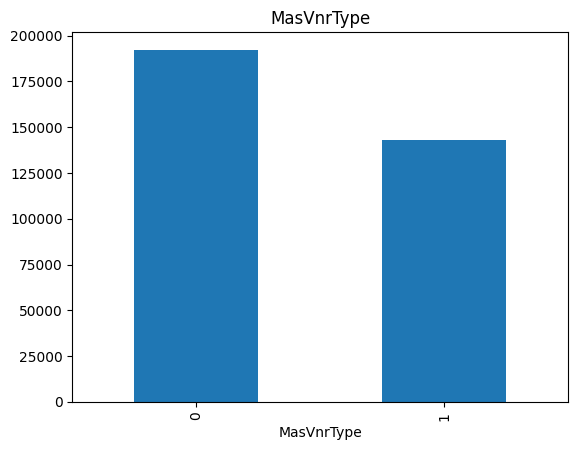

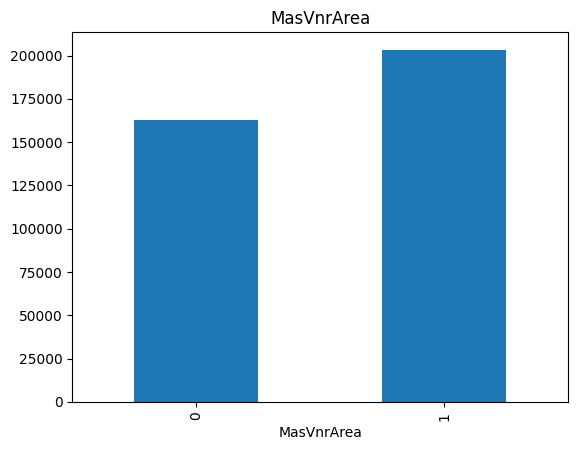

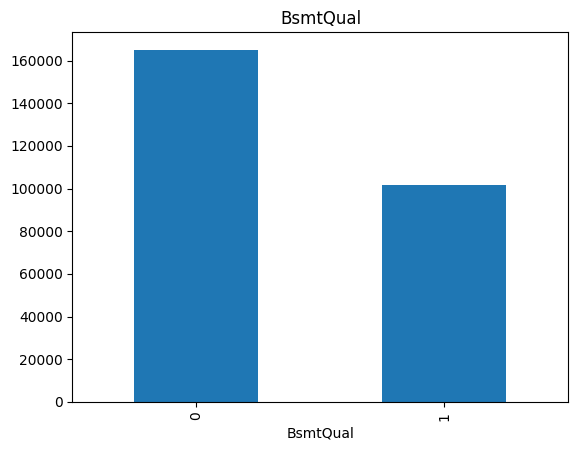

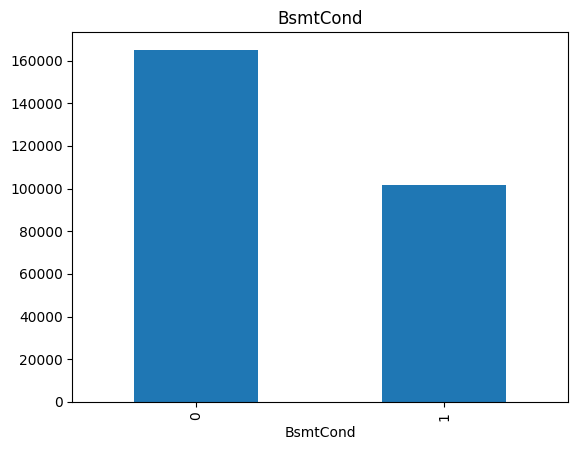

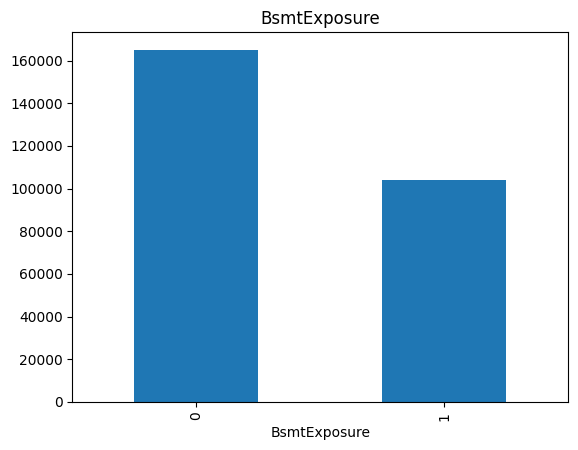

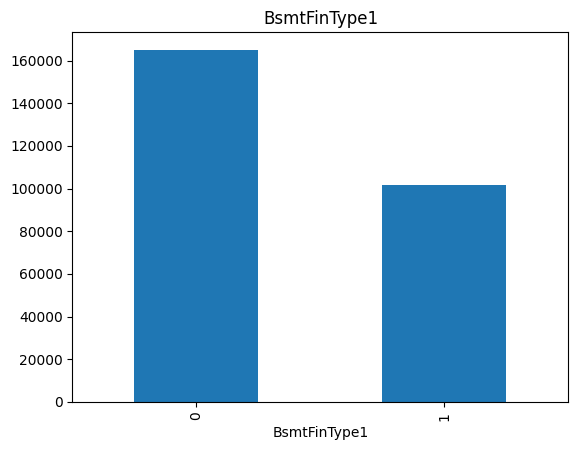

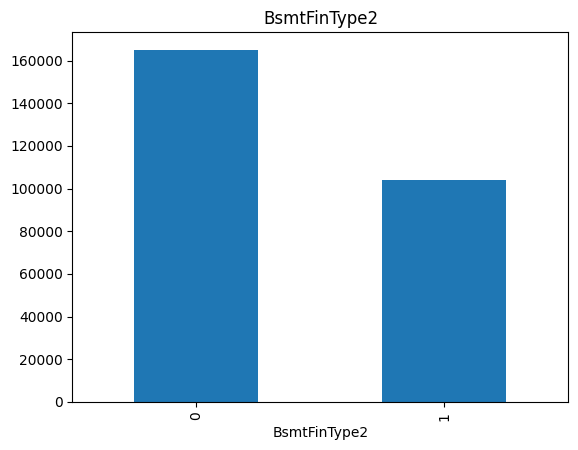

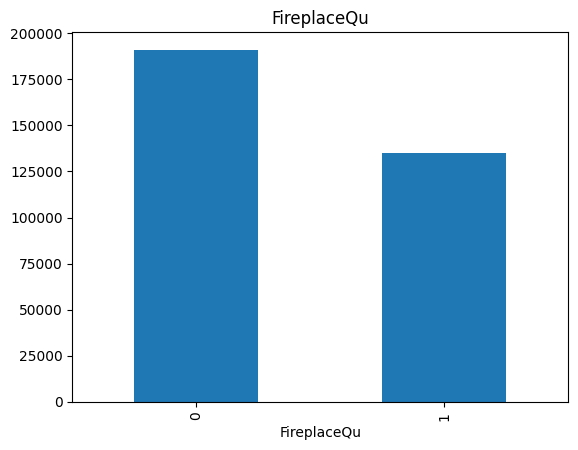

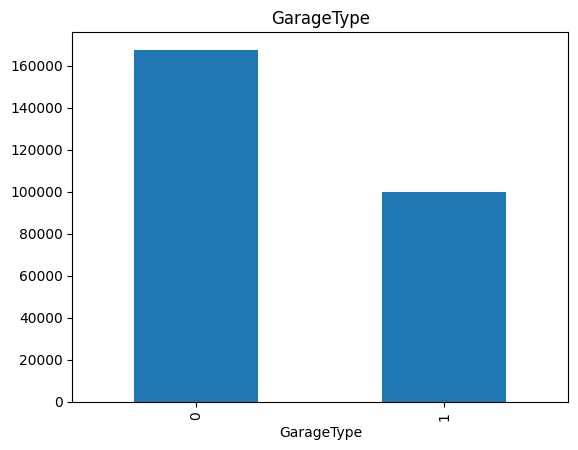

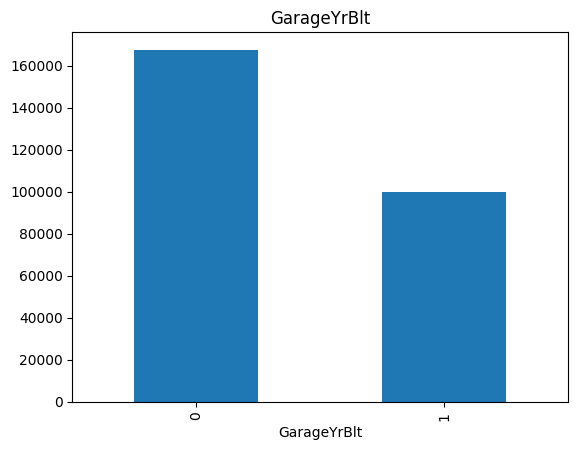

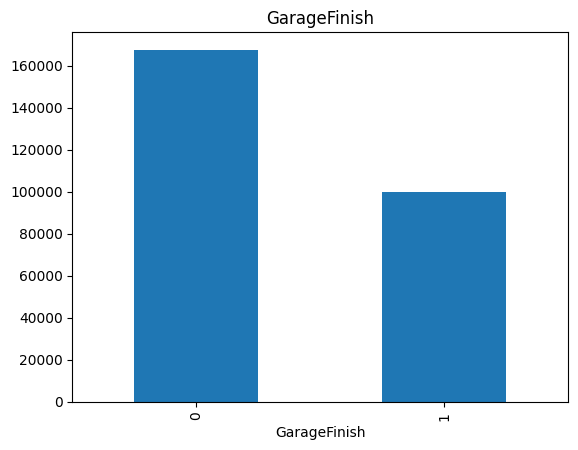

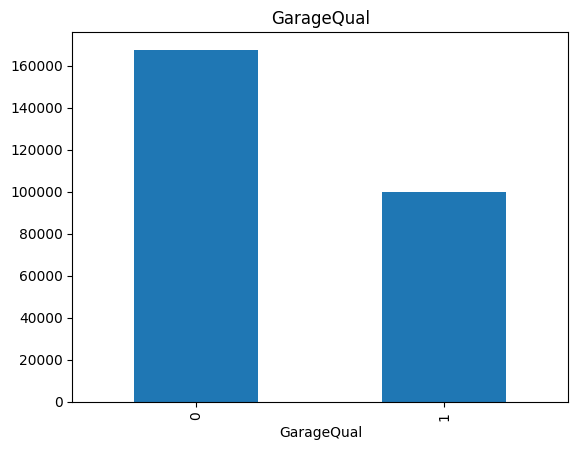

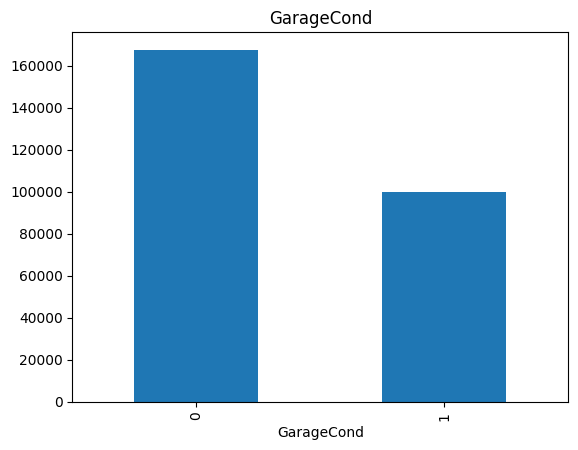

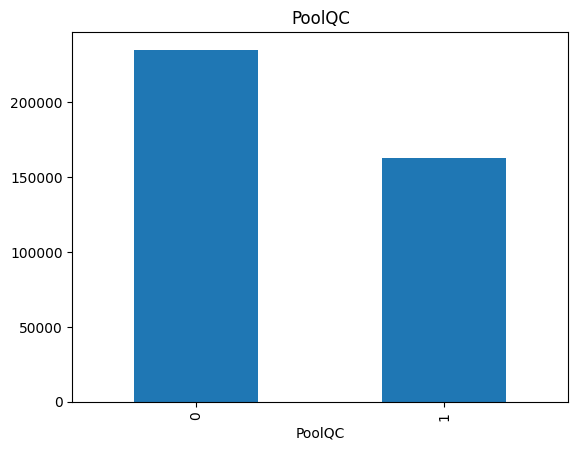

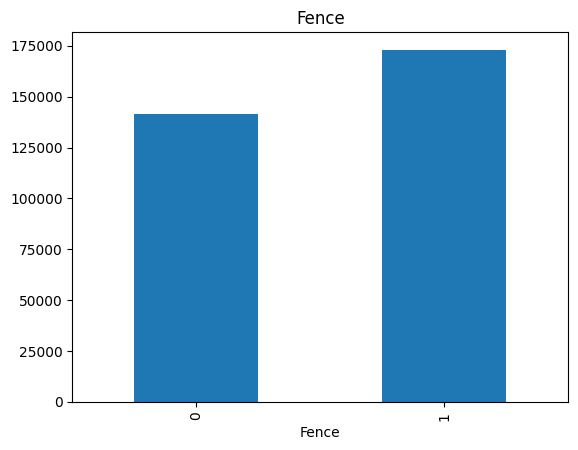

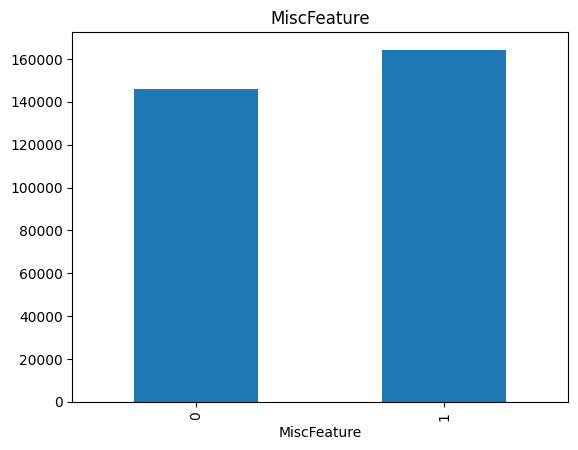

In [14]:
for feature in features_with_na:
    data = df_train.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section



## **"Numerical Variable"**

In [15]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

**Temporal Variables(Eg: Datetime Variables)**

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

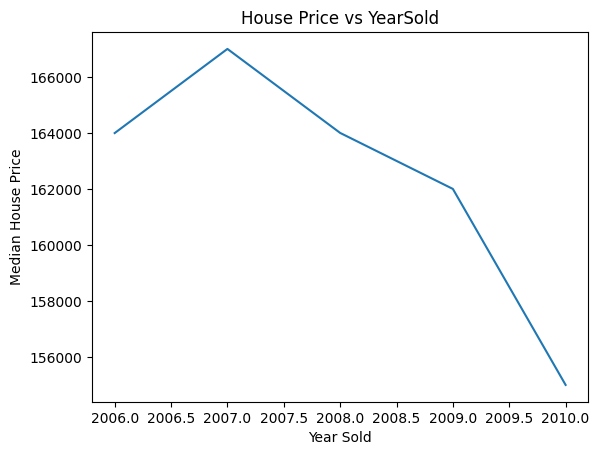

In [18]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



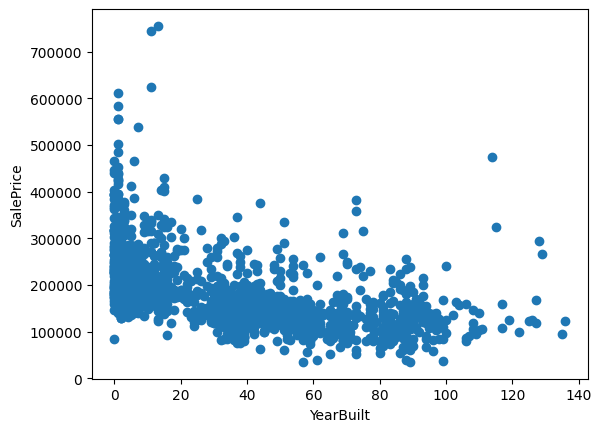

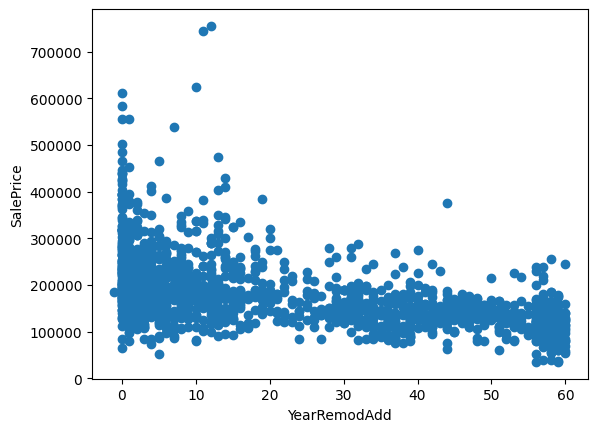

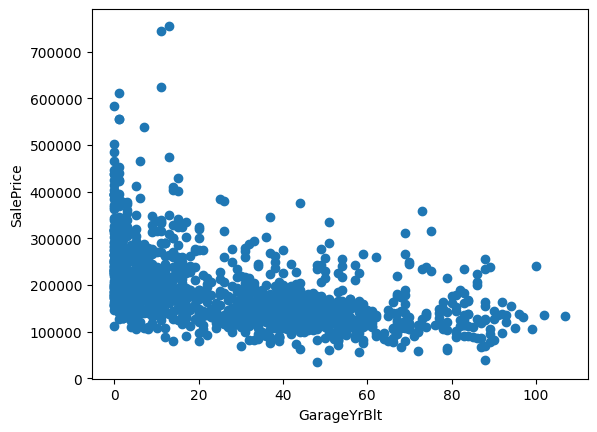

In [19]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df_train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()




#### **Discrete**

In [20]:
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [21]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [22]:
df_train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

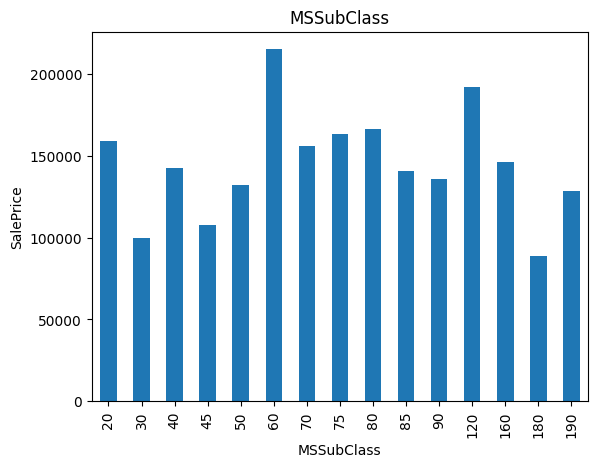

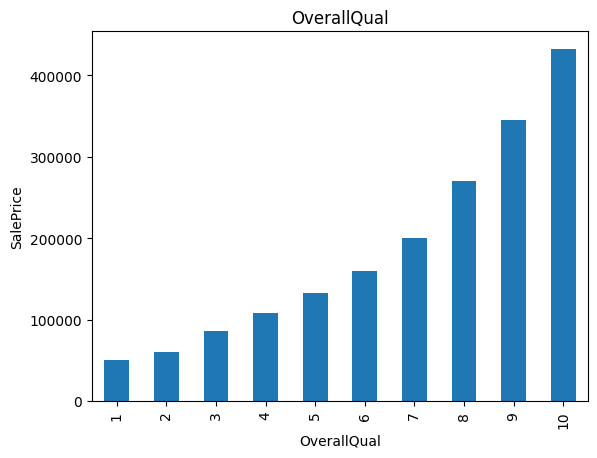

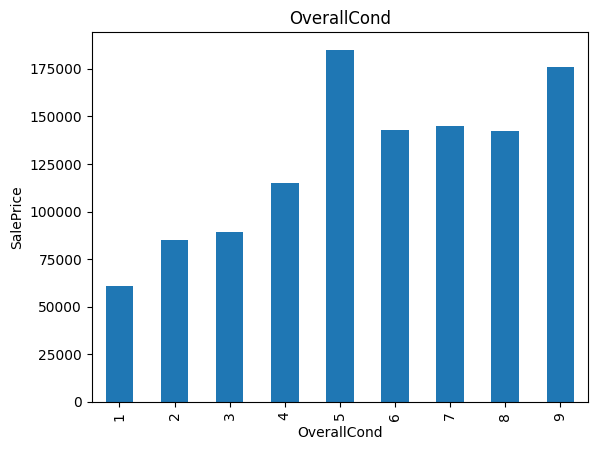

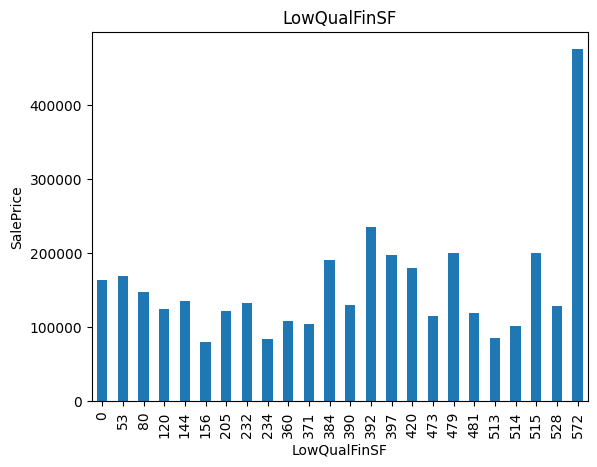

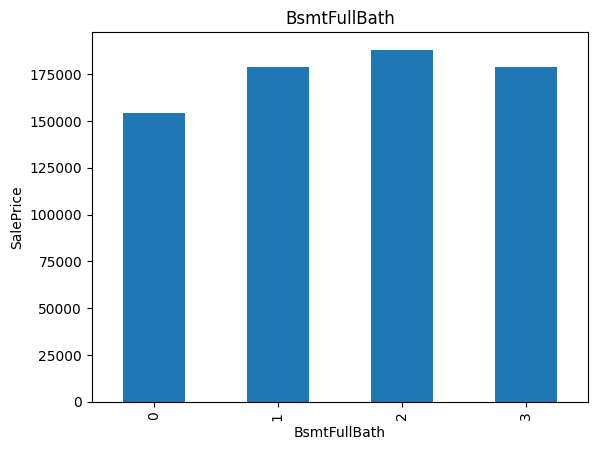

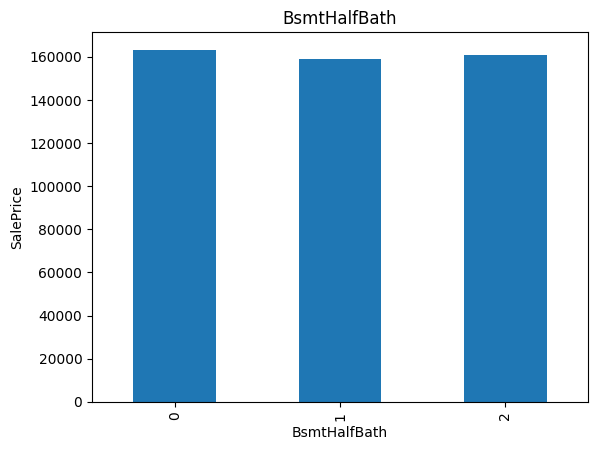

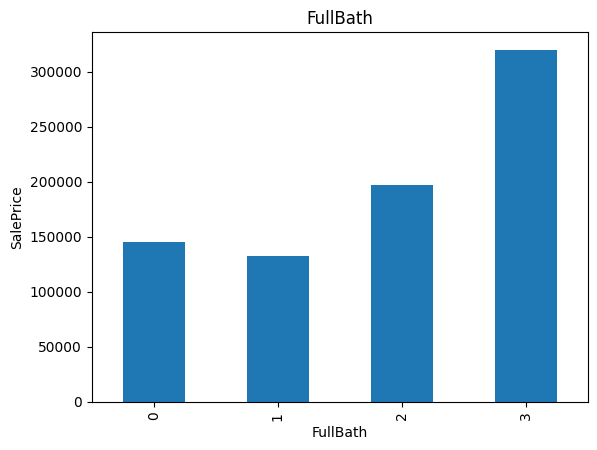

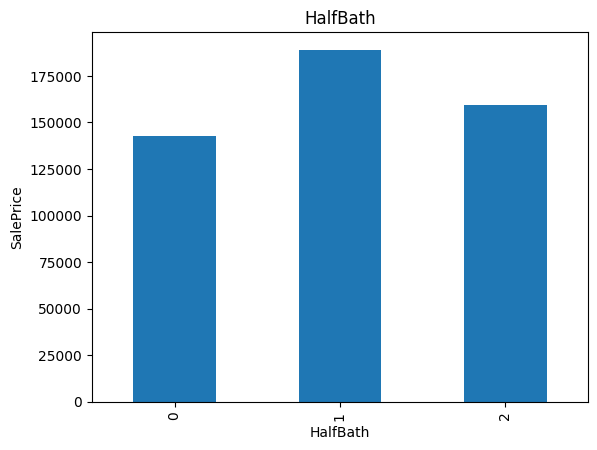

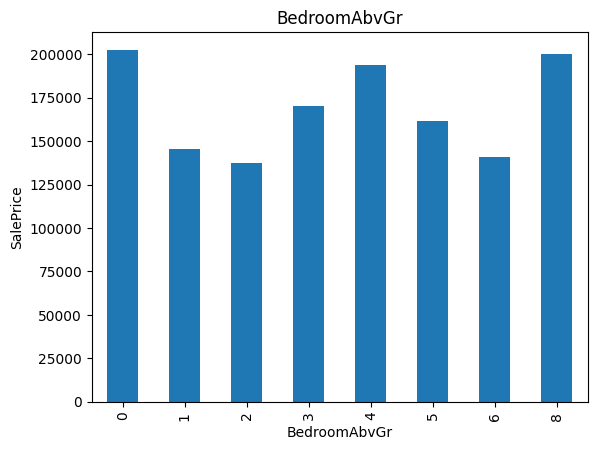

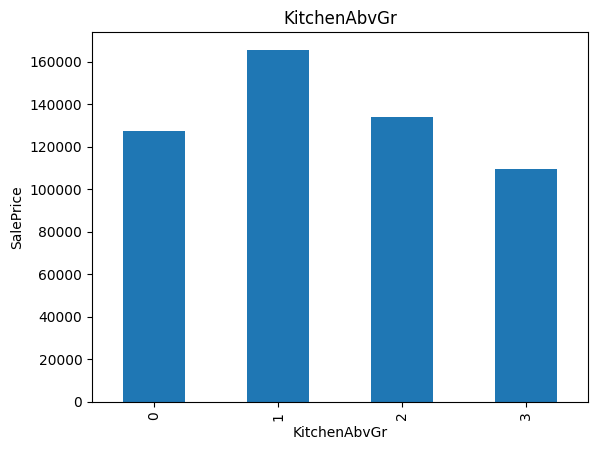

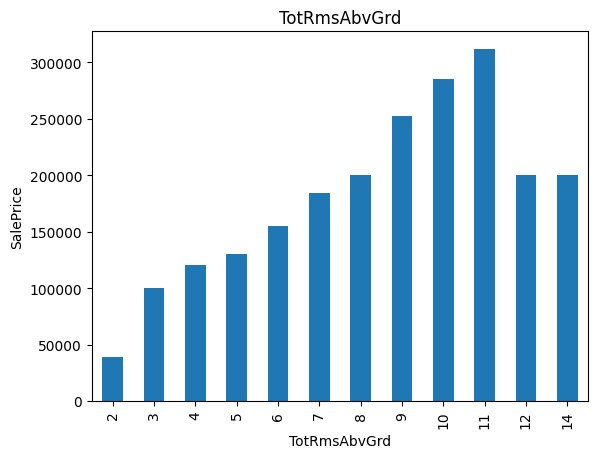

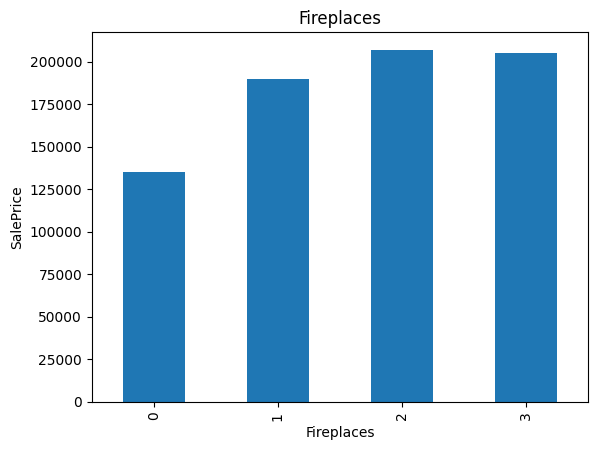

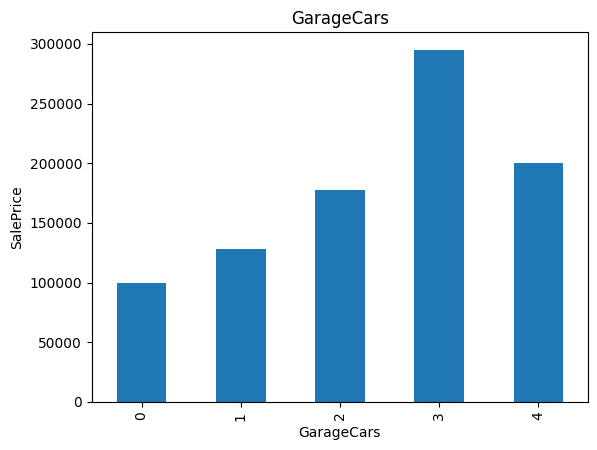

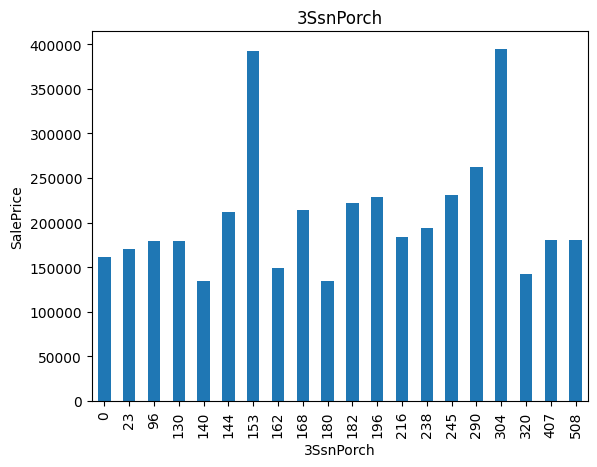

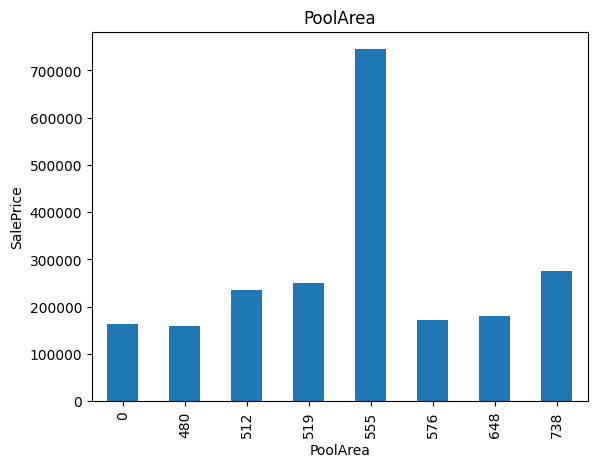

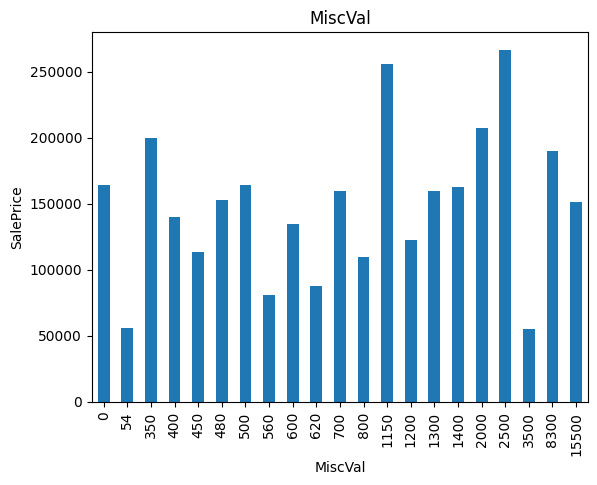

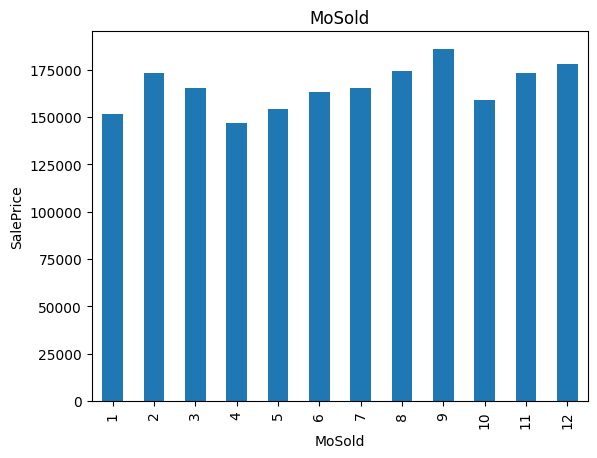

In [23]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### **Continuous**

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


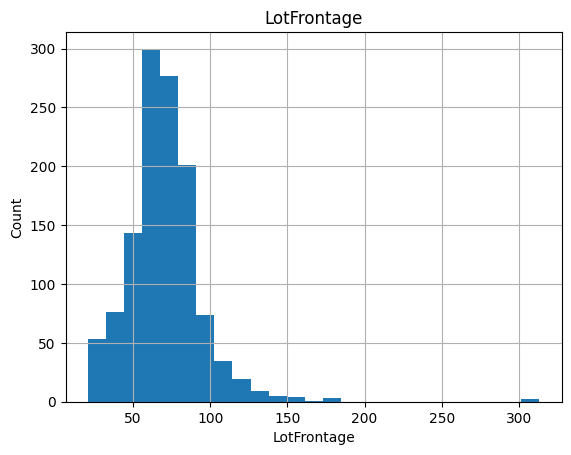

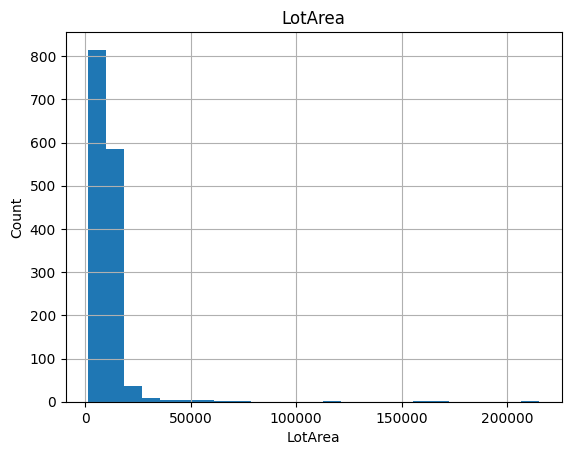

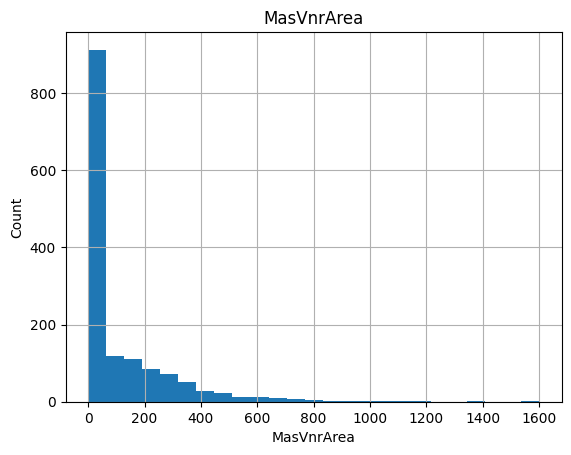

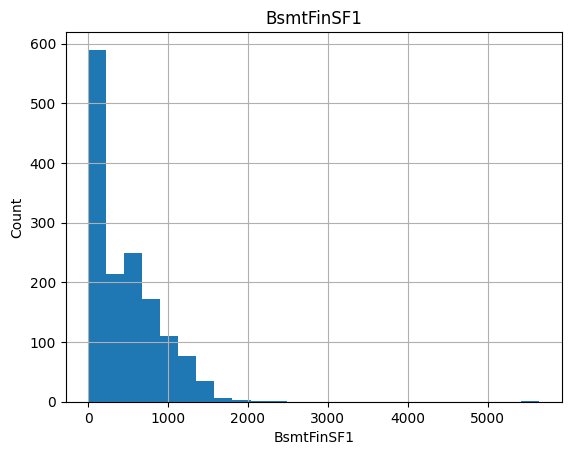

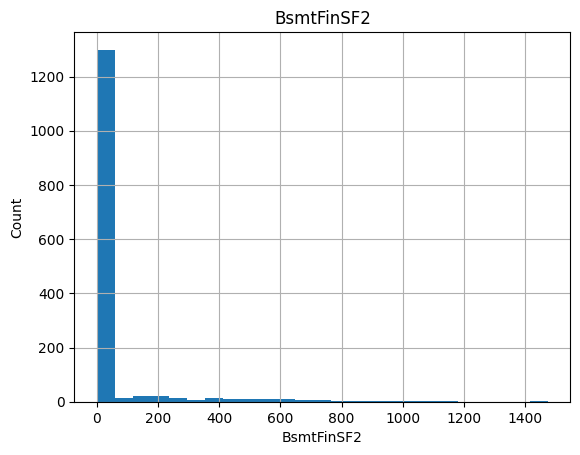

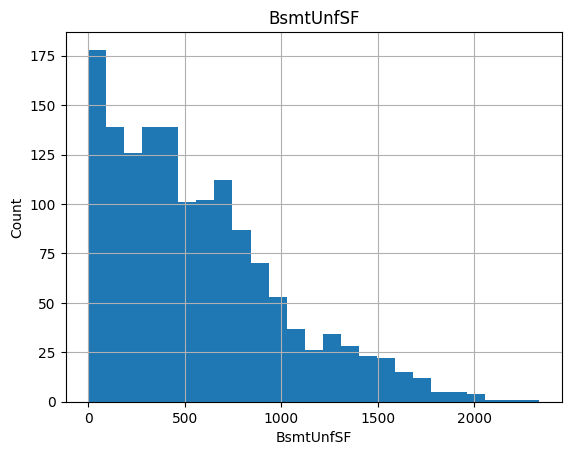

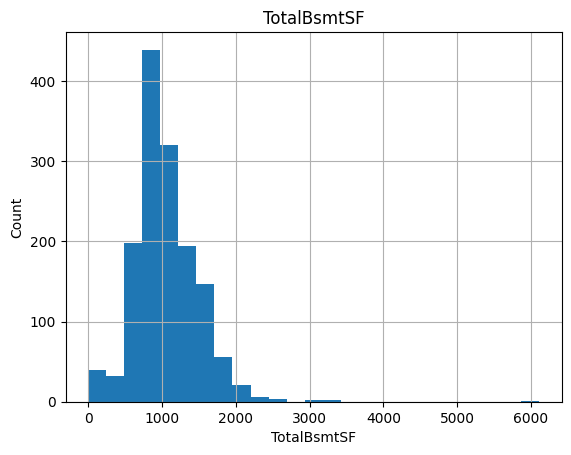

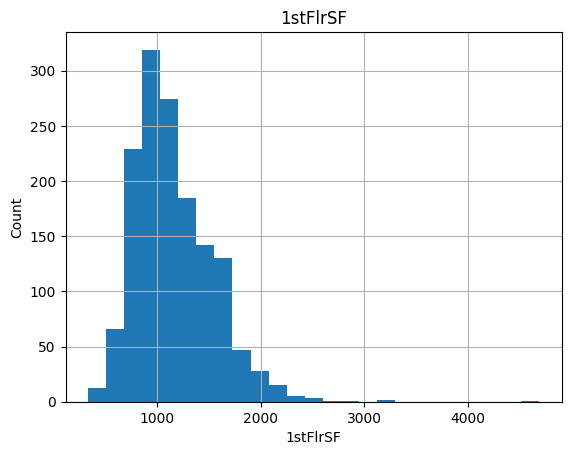

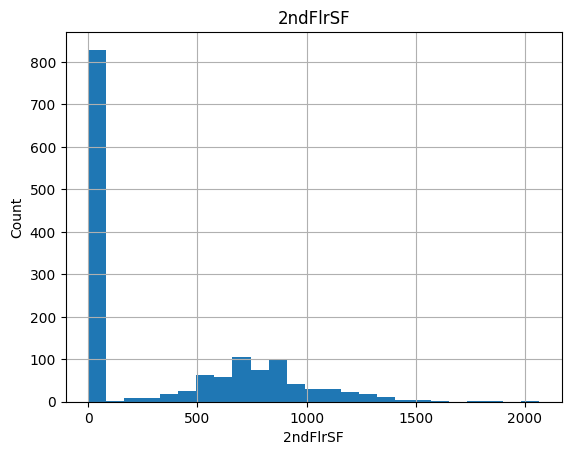

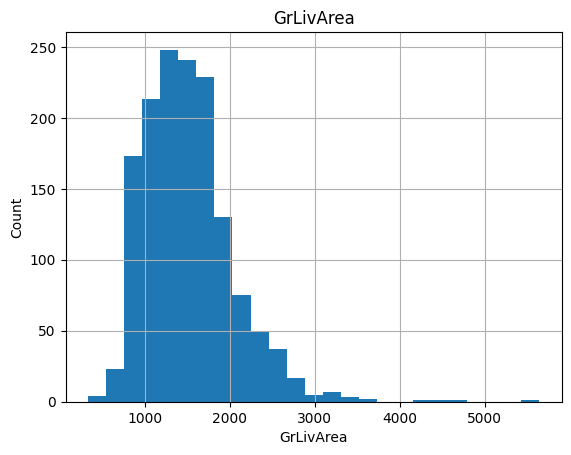

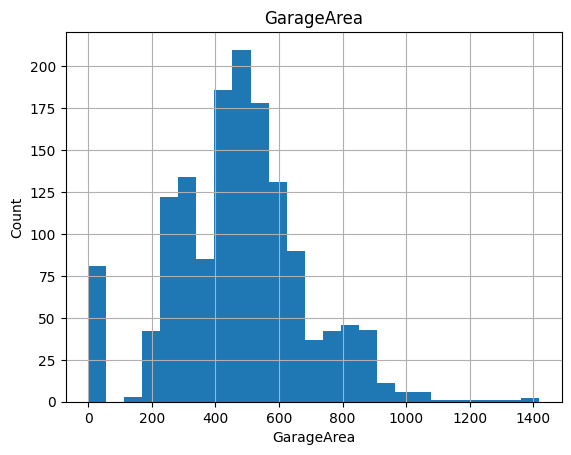

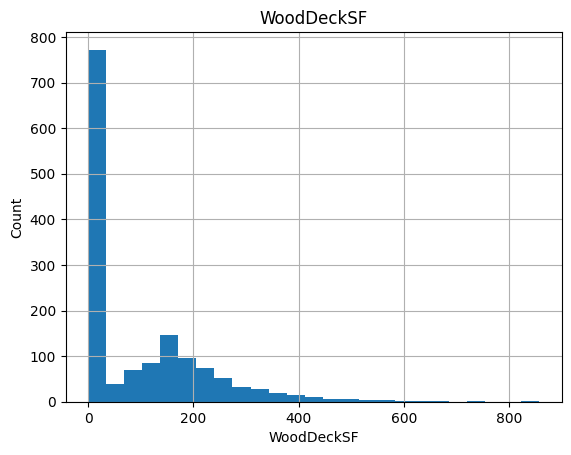

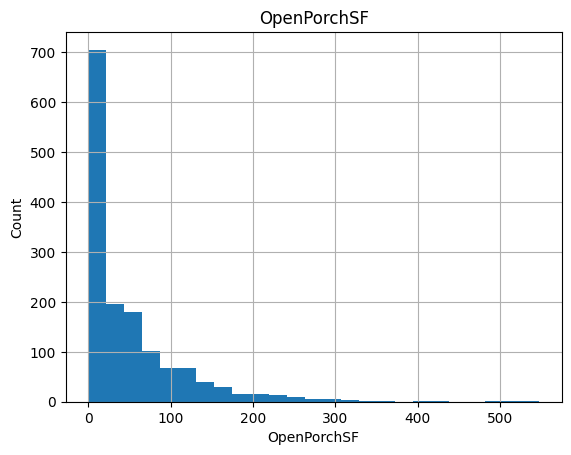

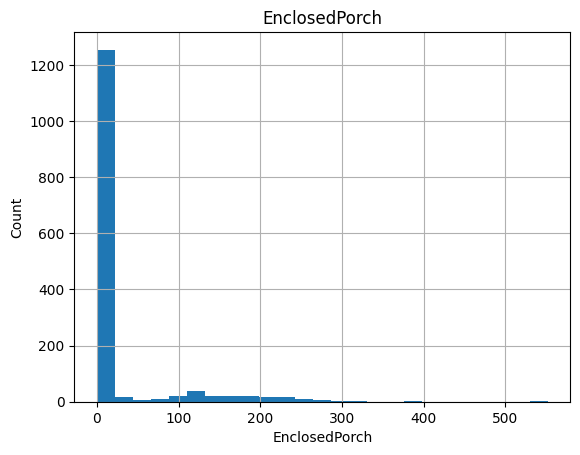

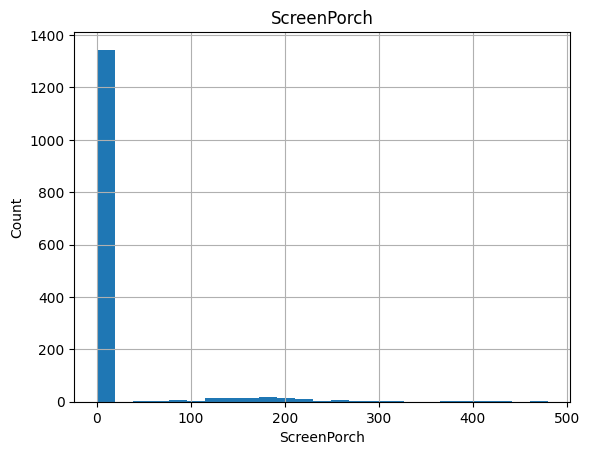

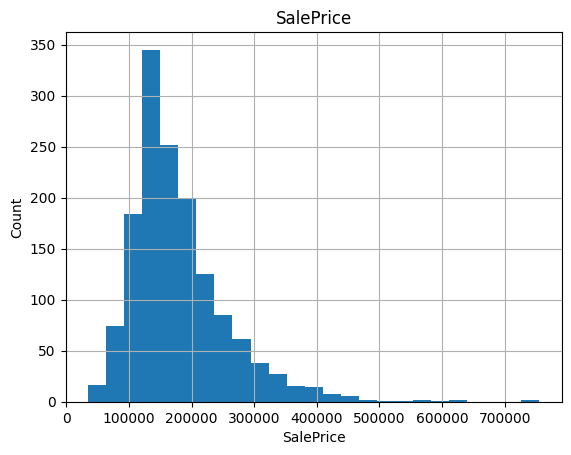

In [25]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


## **Outliers**

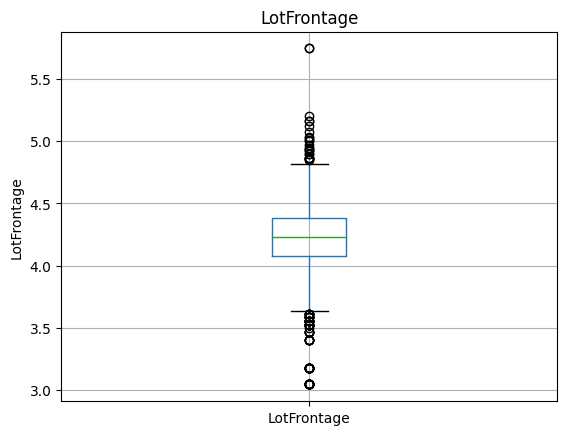

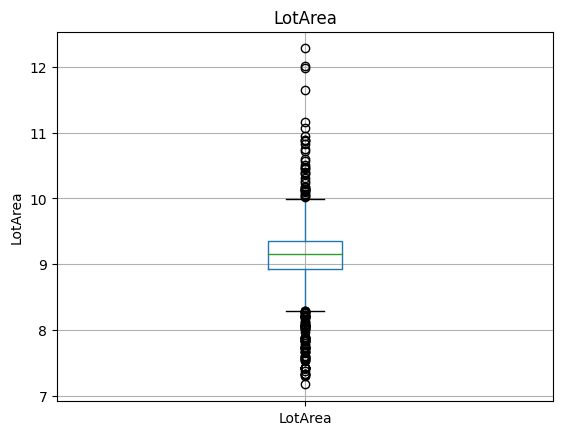

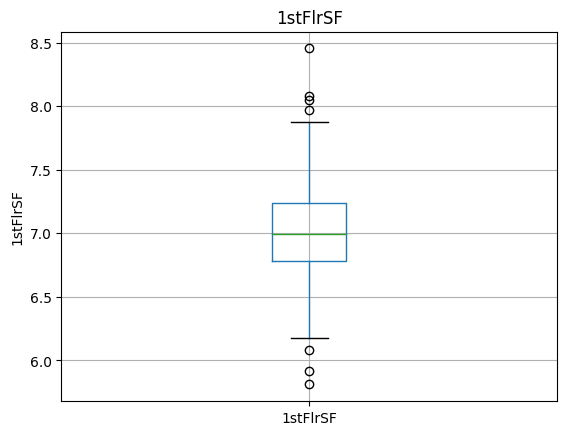

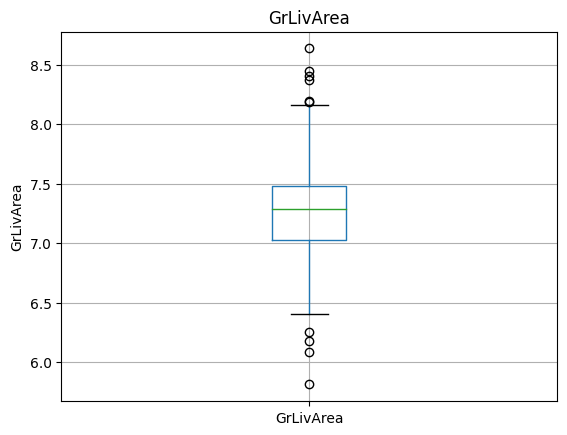

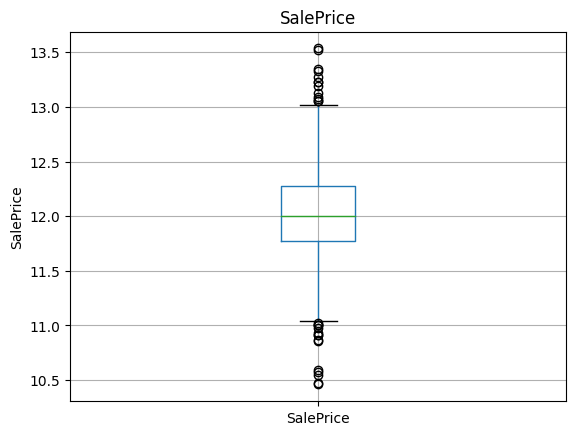

In [26]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])  ##log normal transformation
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()



## **Categorical Variables**

In [27]:
categorical_features=[feature for feature in df_train.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
df_train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [29]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

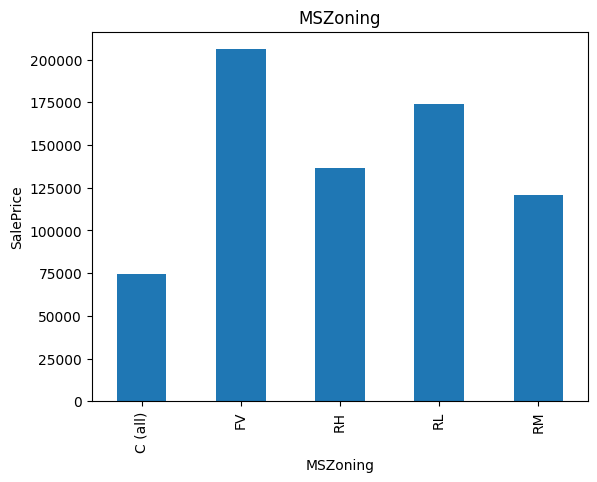

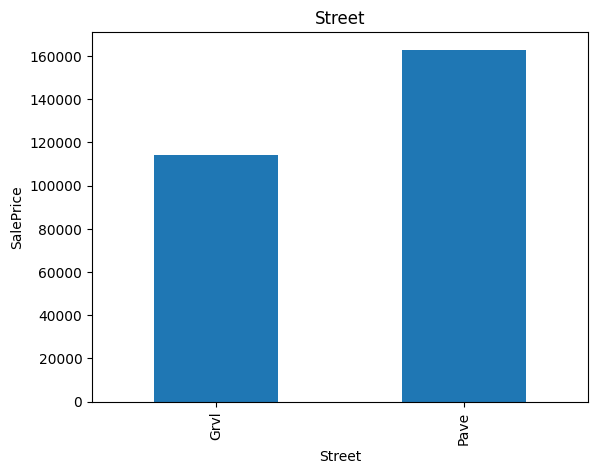

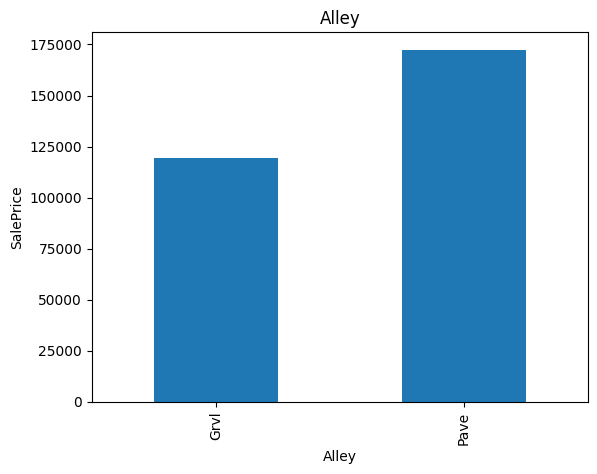

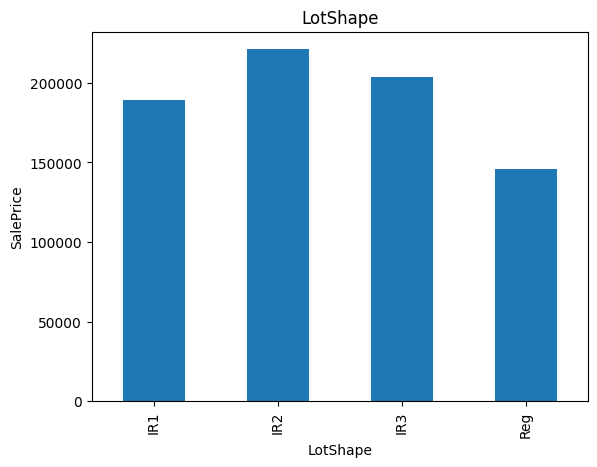

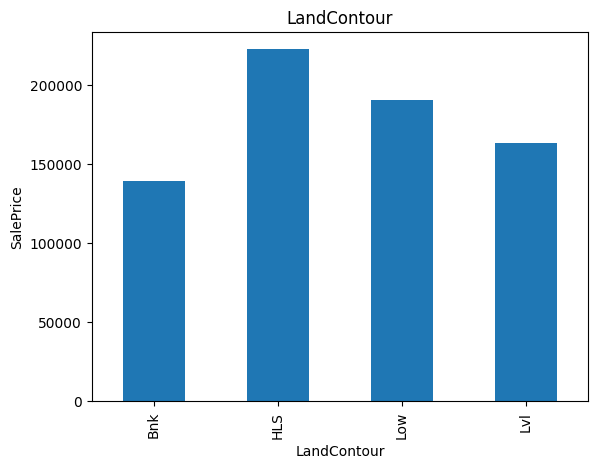

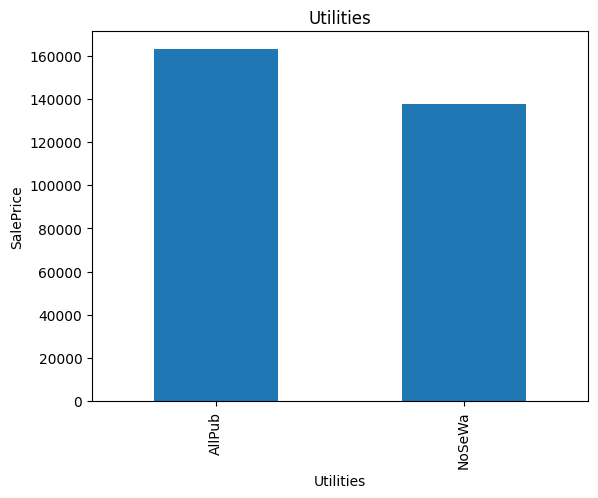

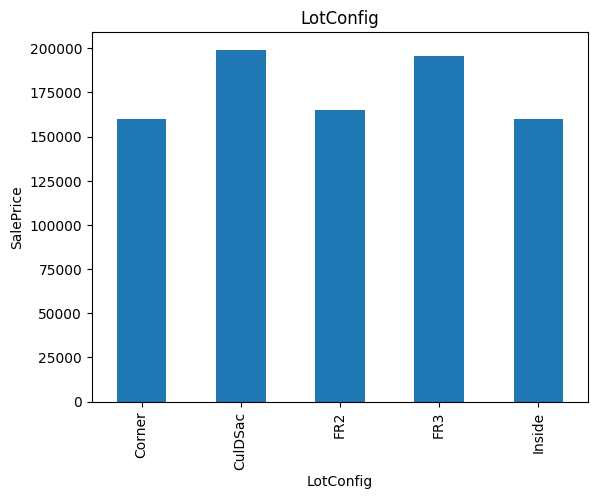

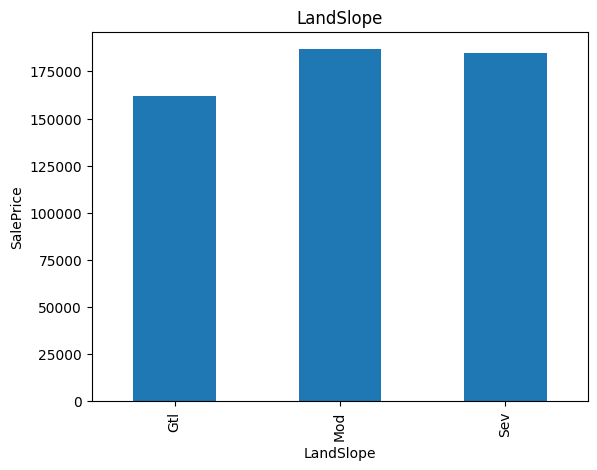

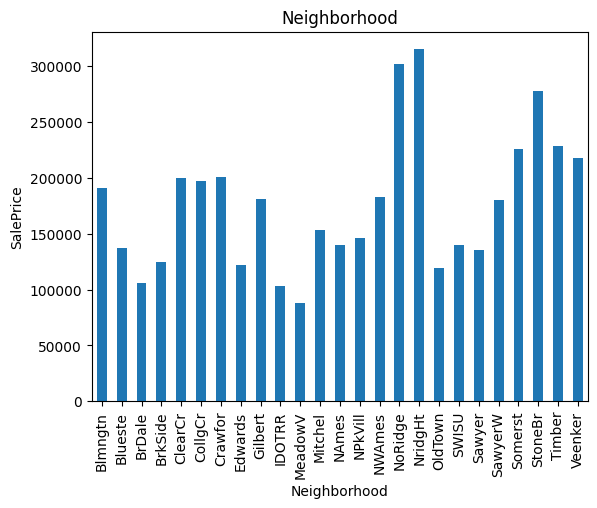

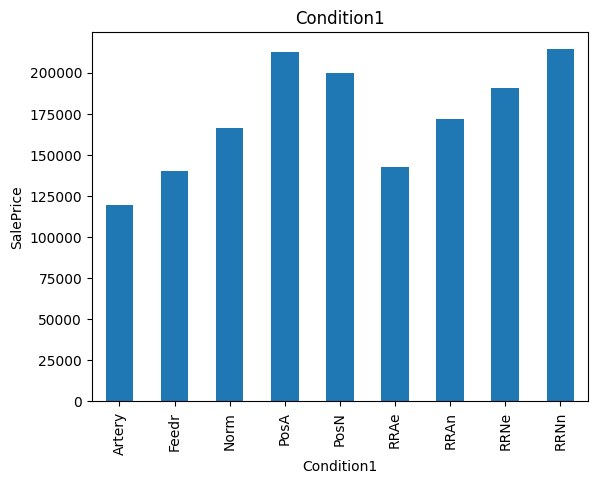

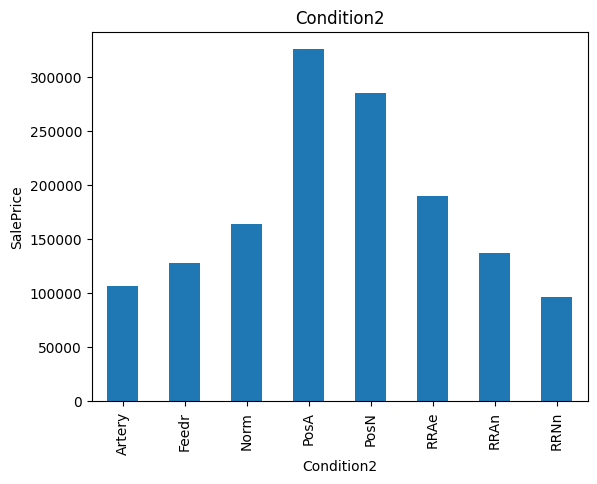

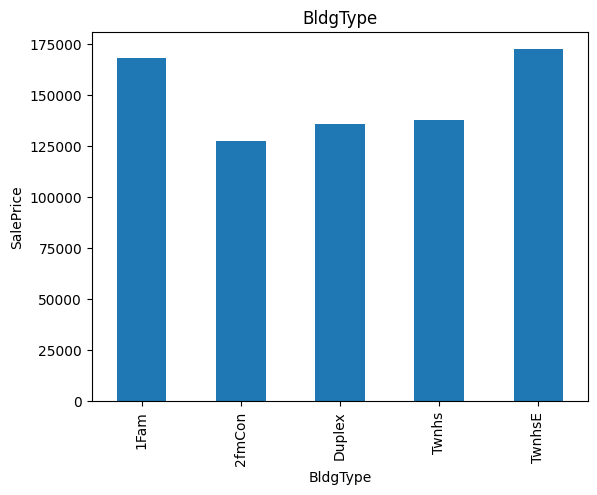

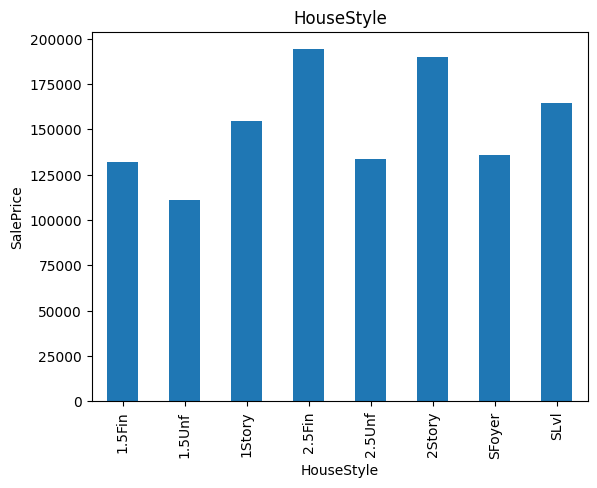

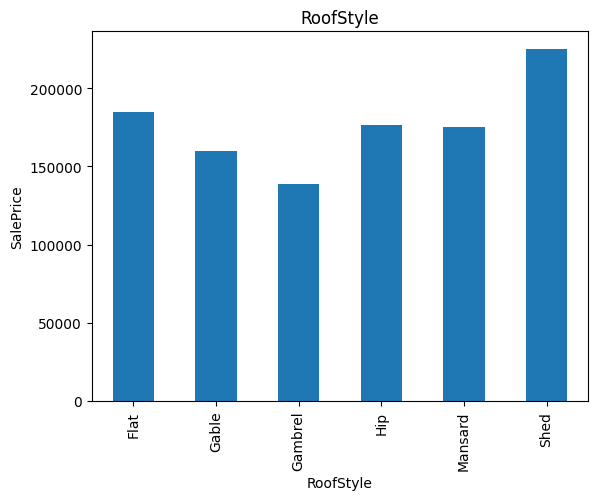

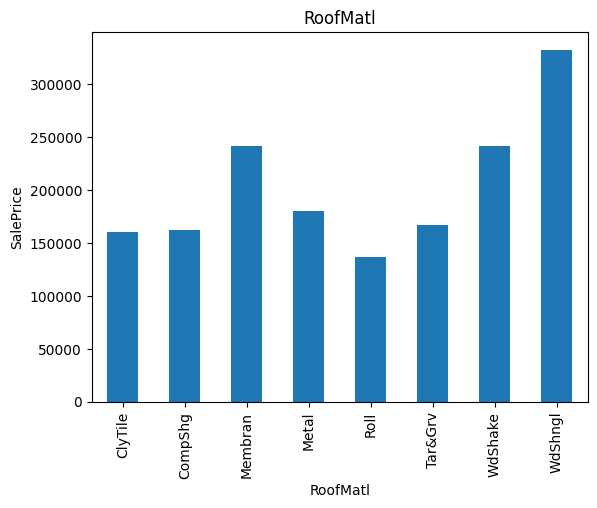

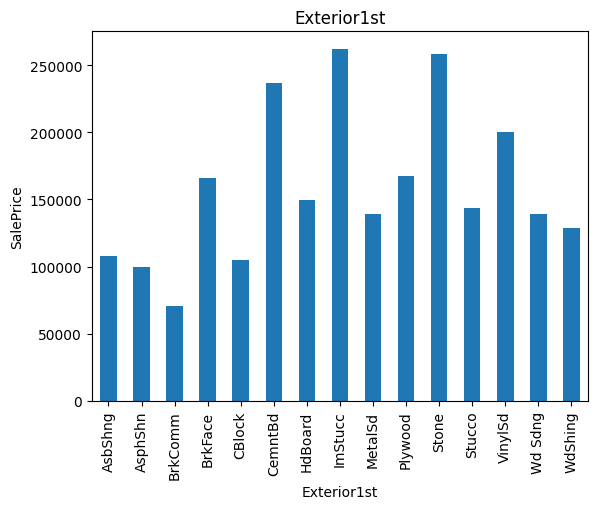

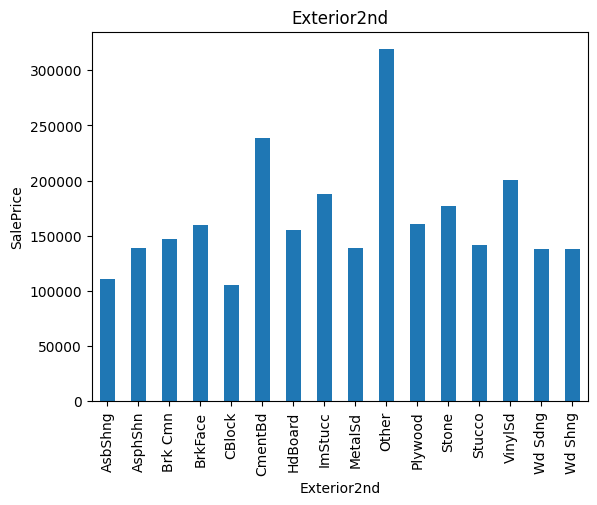

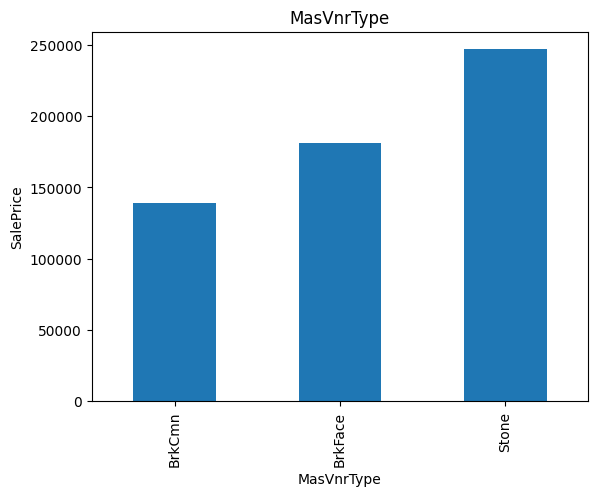

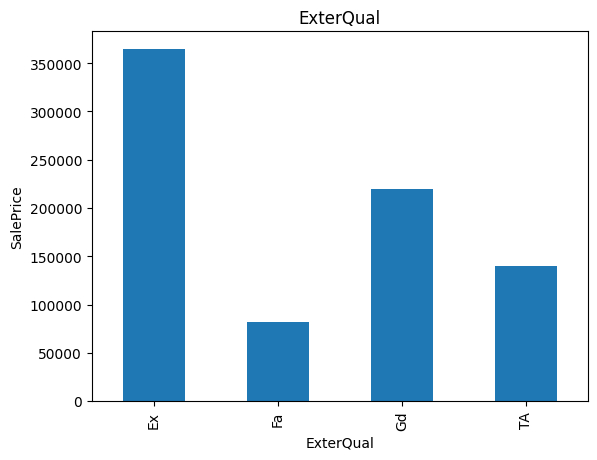

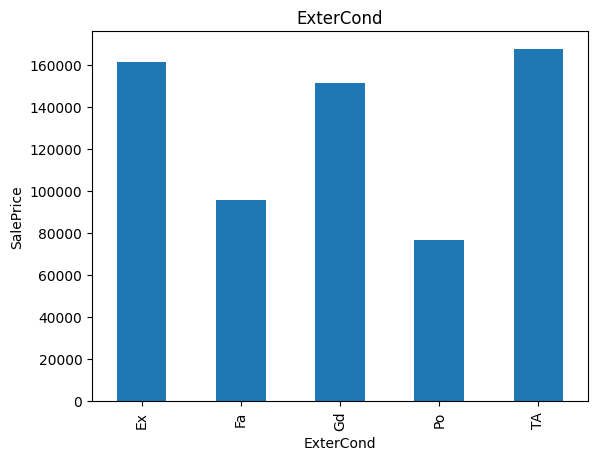

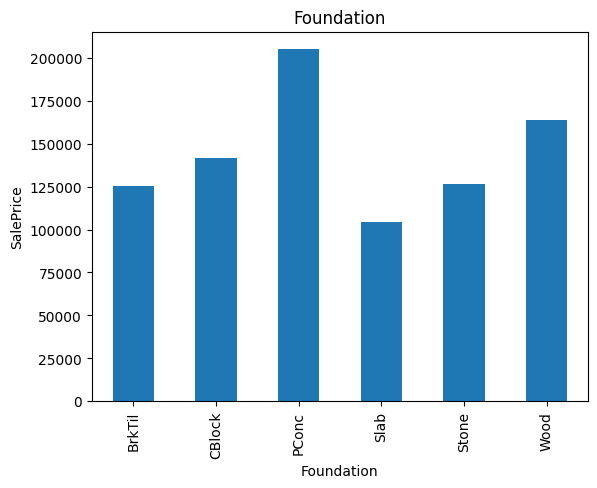

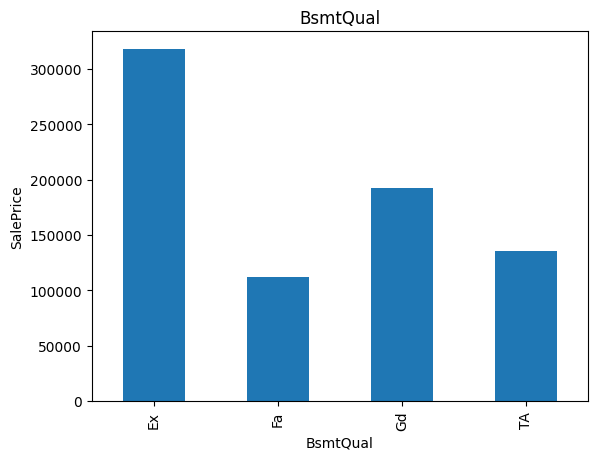

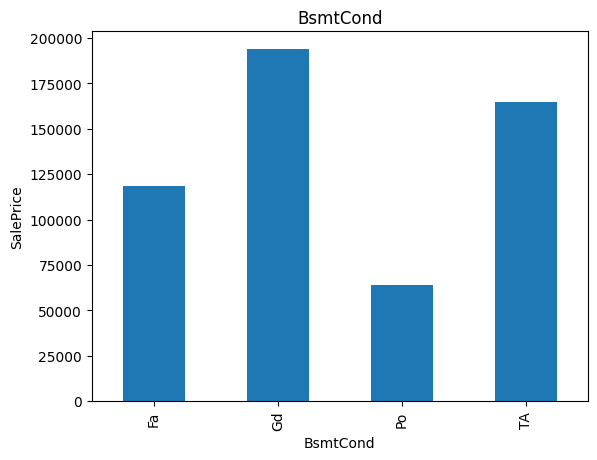

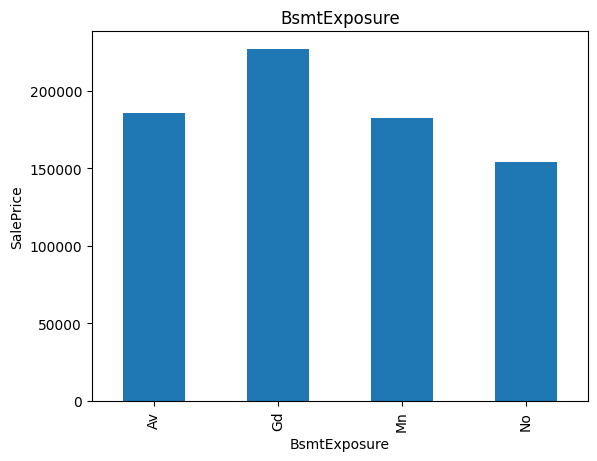

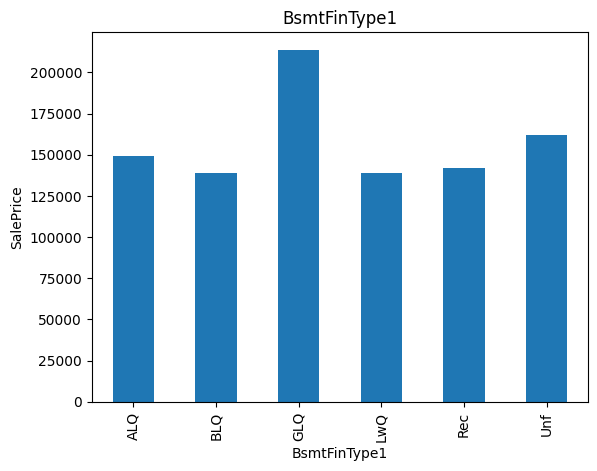

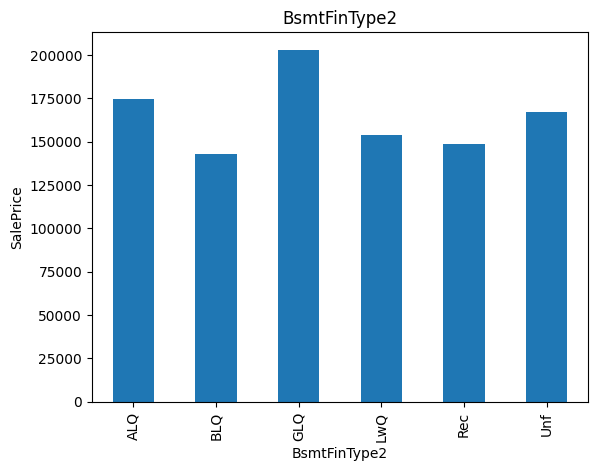

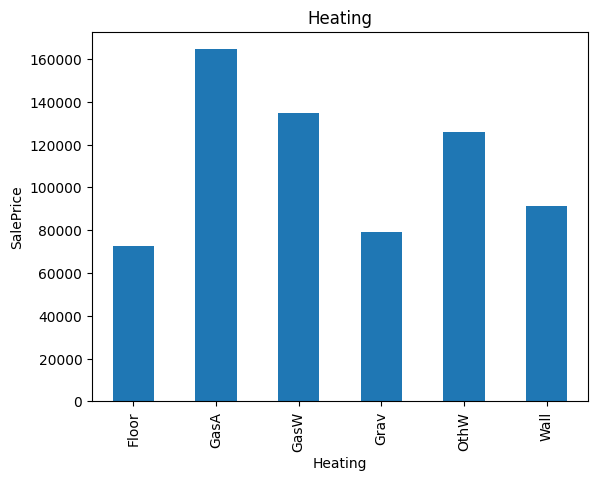

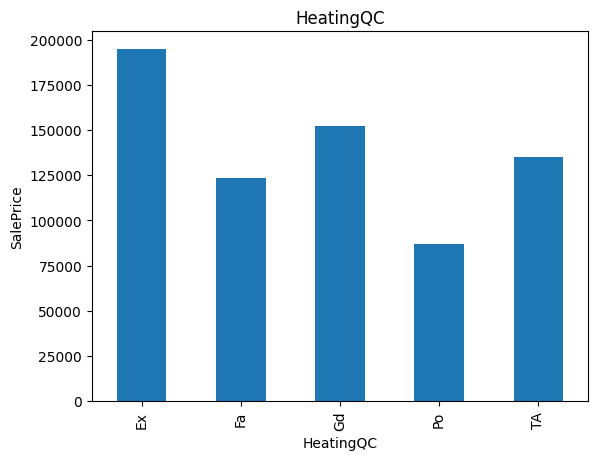

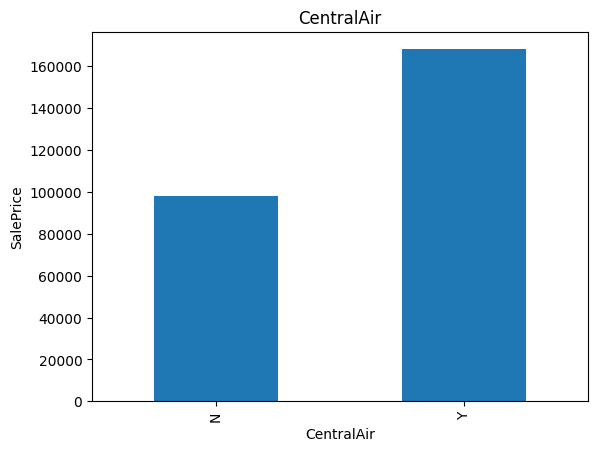

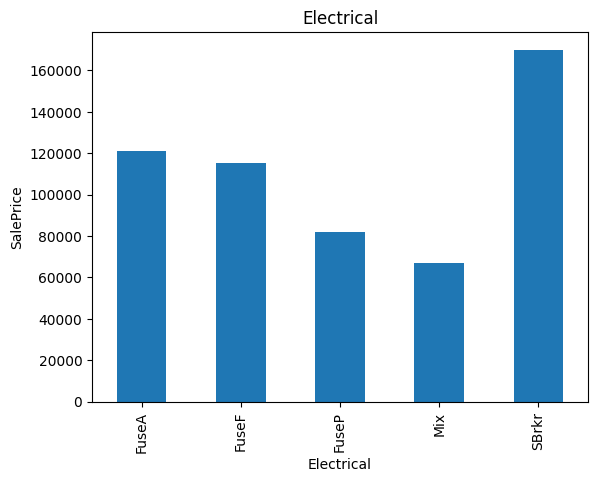

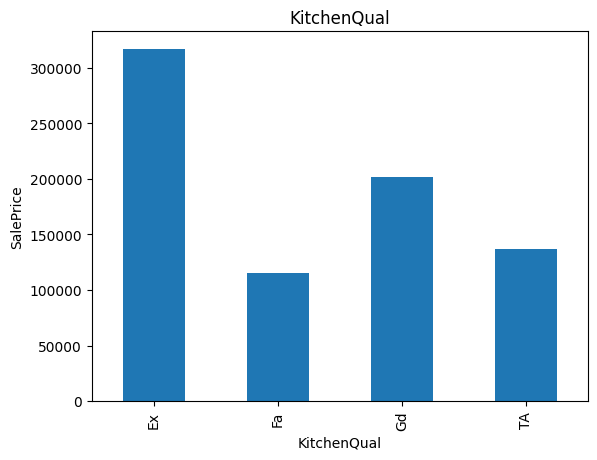

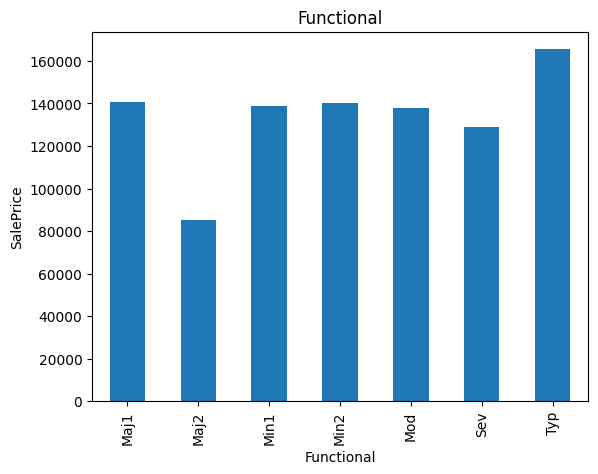

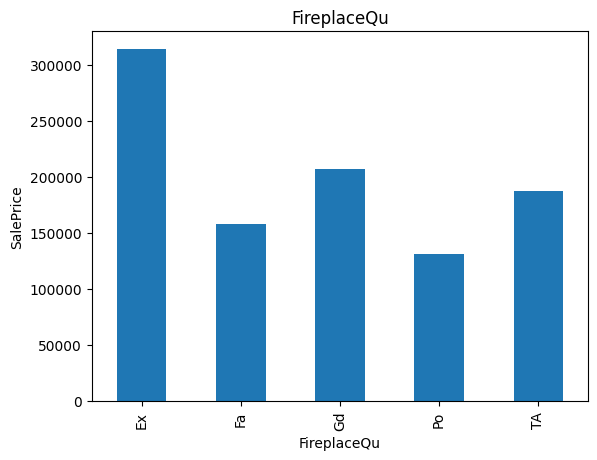

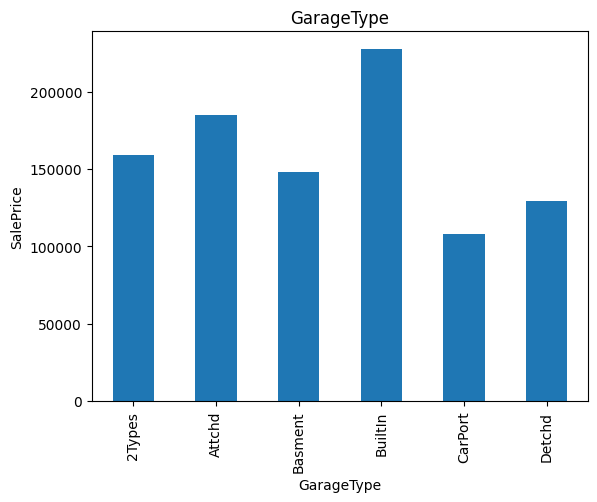

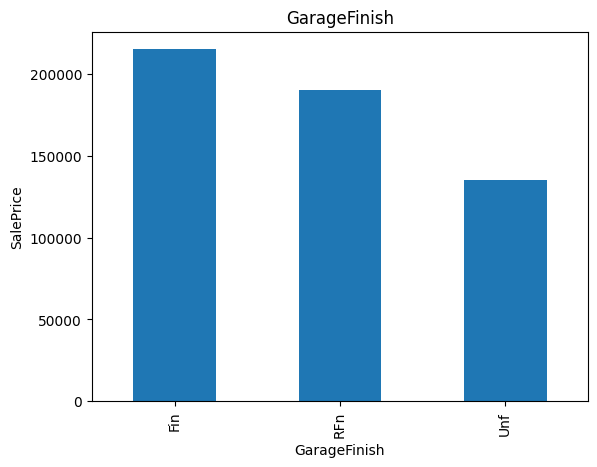

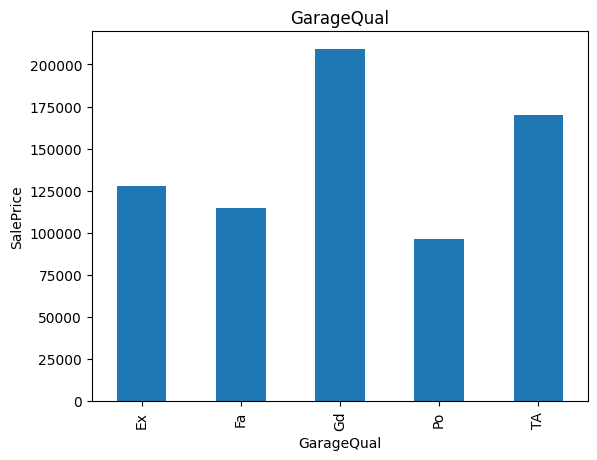

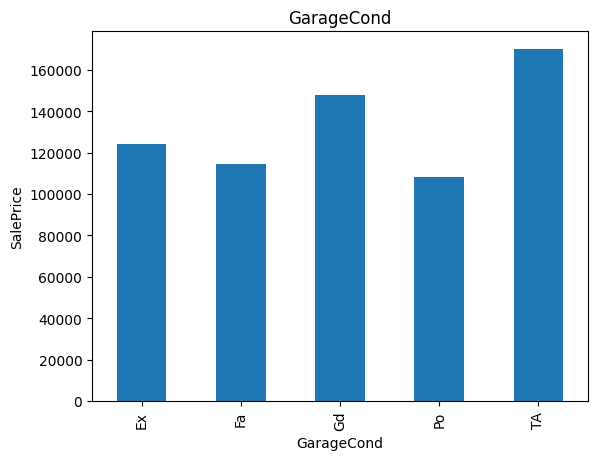

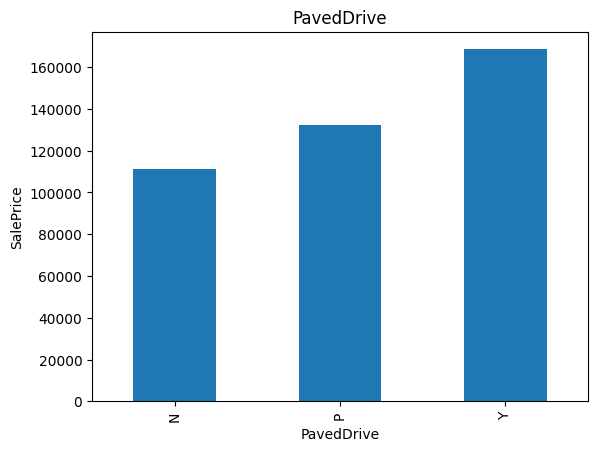

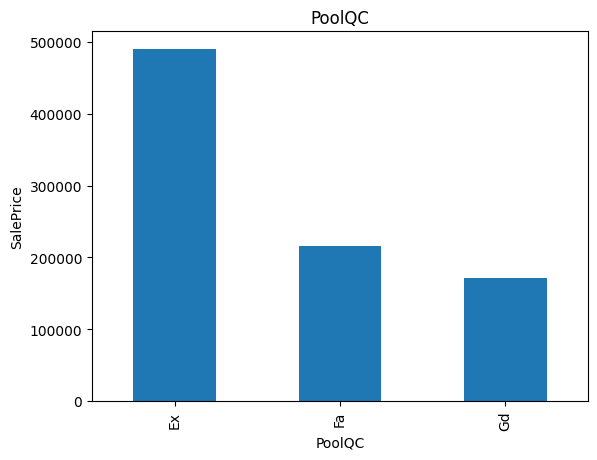

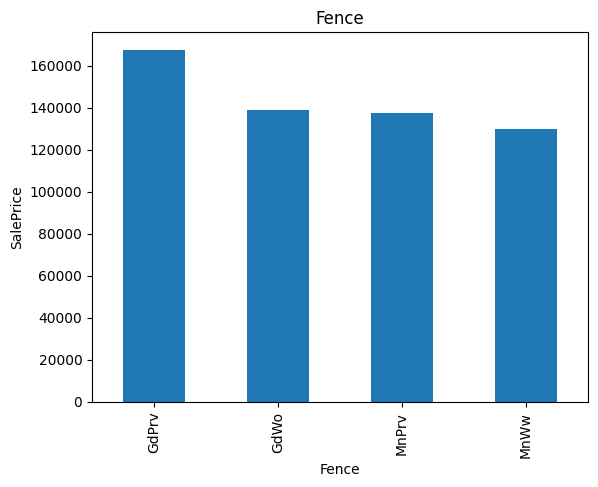

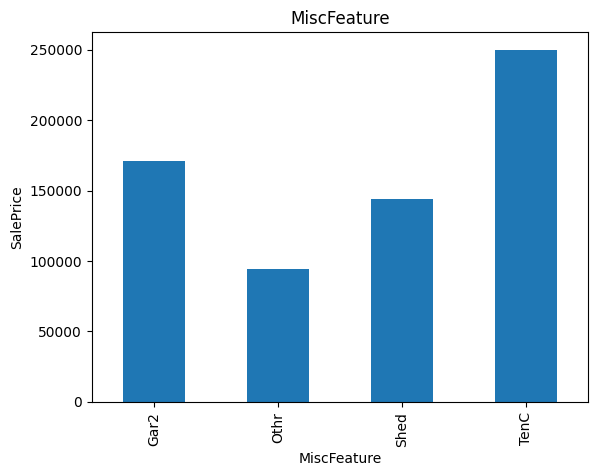

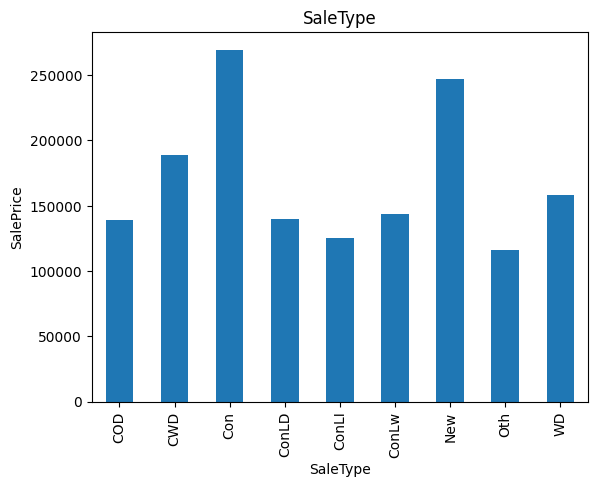

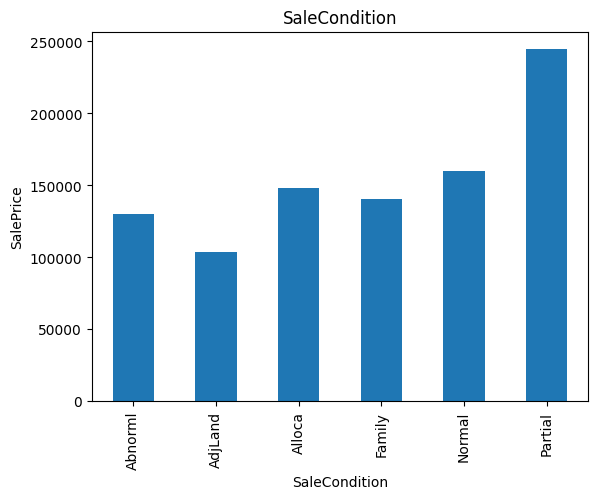

In [30]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# **Feature Engineering**

## **Dealing with Missing Values**

In [31]:
Missing_Values_train_set = df_train.isna().sum().sum()
print('Missing Values_train_set:', Missing_Values_train_set)

Missing Values_train_set: 7829


<Axes: >

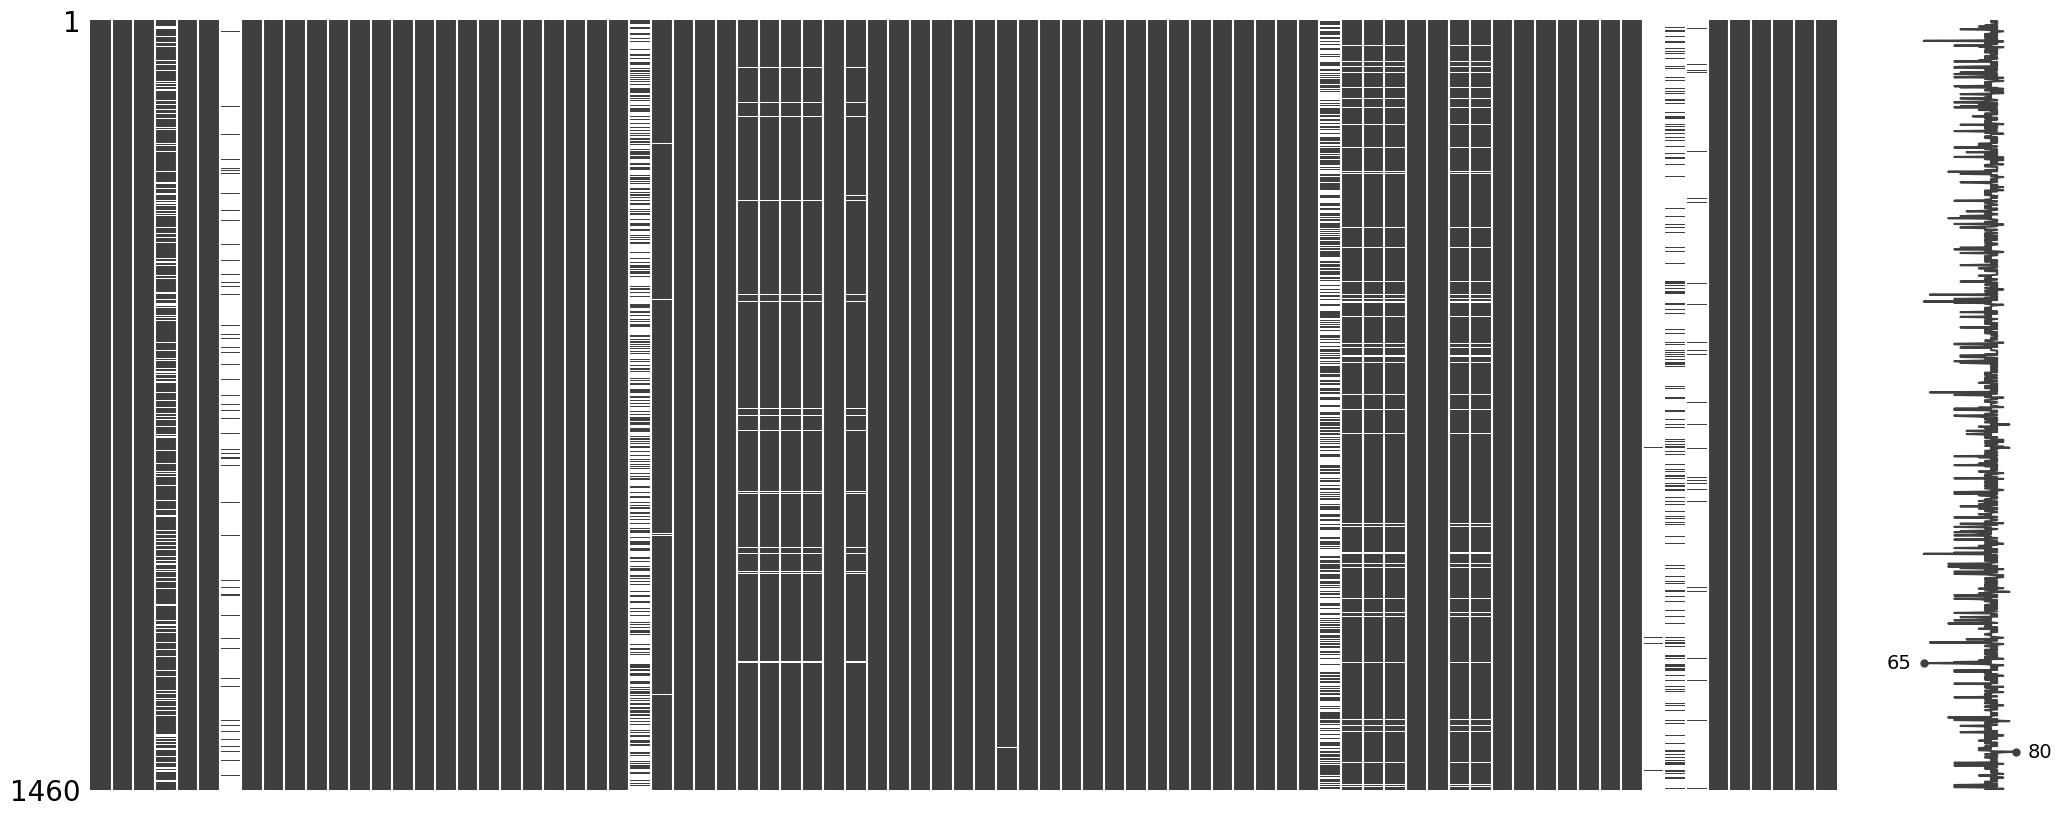

In [32]:
msno.matrix(df_train)

In [33]:
Missing_Values_test_set = df_test.isna().sum().sum()
print('Missing Values_test_set:', Missing_Values_test_set)

Missing Values_test_set: 7878


<Axes: >

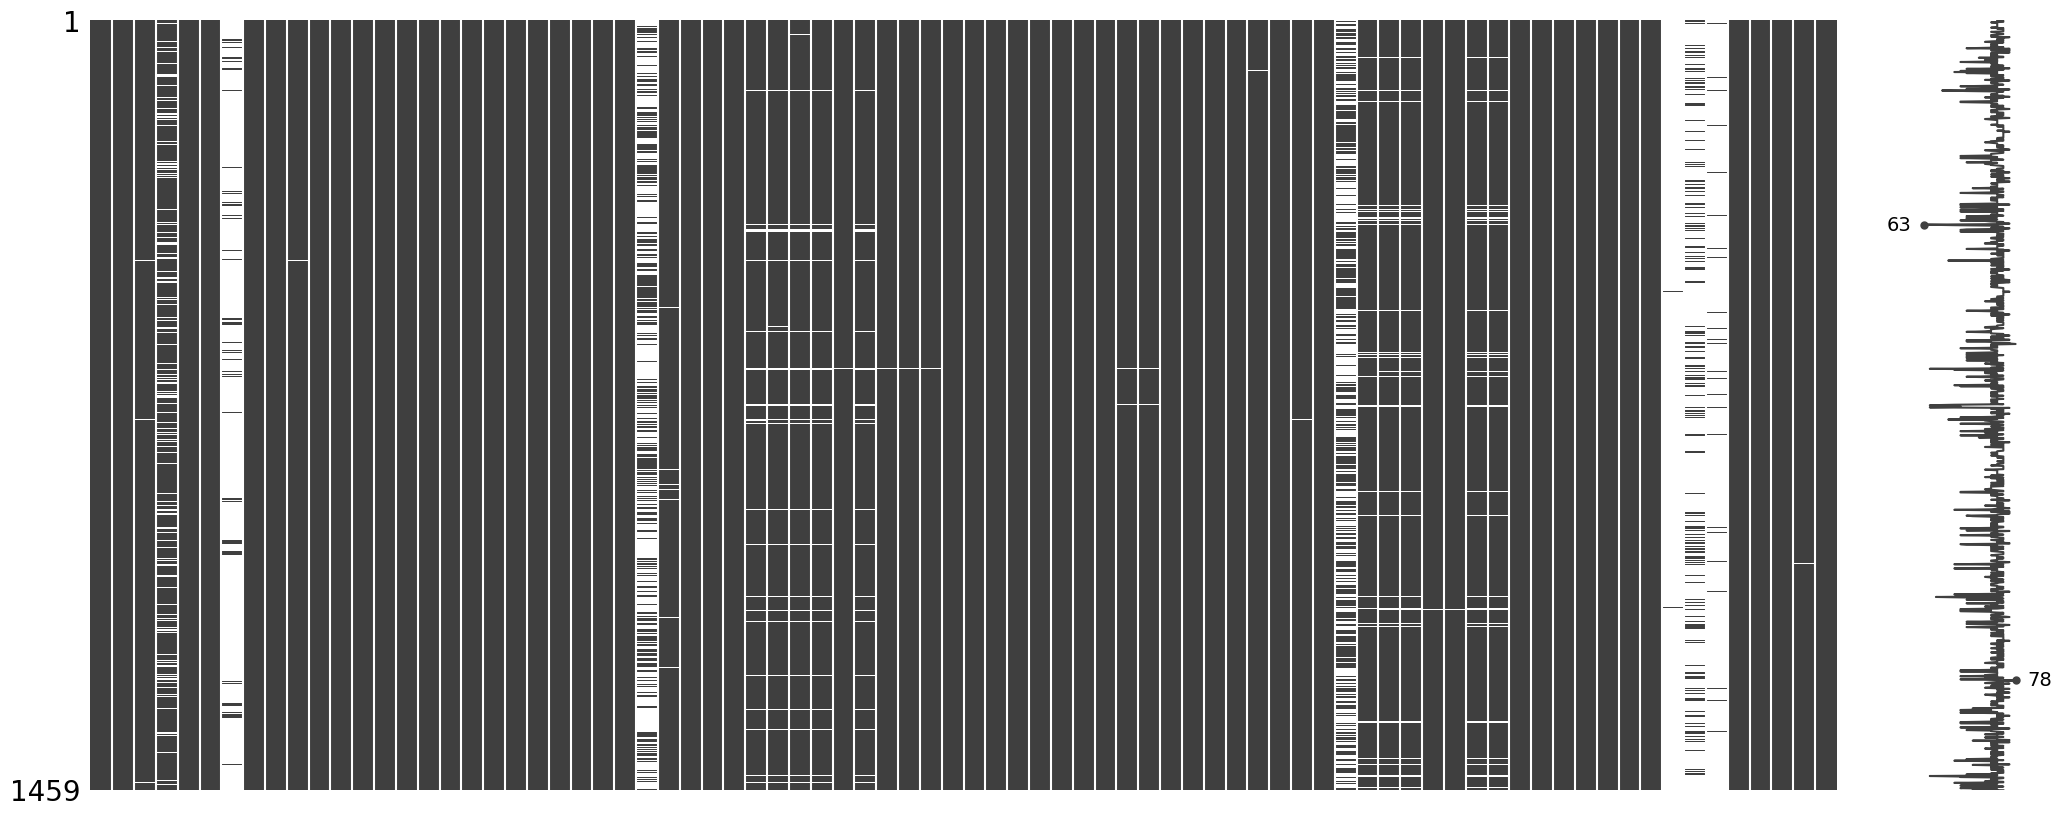

In [34]:
msno.matrix(df_test)

In [35]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df_train[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [36]:



## Saving the target values in "y_train".
y = df_train['SalePrice'].reset_index(drop=True)



# getting a copy of train
previous_train = df_train.copy()

In [37]:
## Combining train and test datasets together so that we can do all the work at once.
all_data = pd.concat((df_train,df_test)).reset_index(drop = True)
## Dropping the target variable.
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [38]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple.
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


In [39]:
missing_percentage(all_data)

Total  Percent
PoolQC         2909    99.66
MiscFeature    2814    96.40
Alley          2721    93.22
Fence          2348    80.44
MasVnrType     1766    60.50
FireplaceQu    1420    48.65
LotFrontage     486    16.65
GarageQual      159     5.45
GarageCond      159     5.45
GarageYrBlt     159     5.45
GarageFinish    159     5.45
GarageType      157     5.38
BsmtExposure     82     2.81
BsmtCond         82     2.81
BsmtQual         81     2.77
BsmtFinType2     80     2.74
BsmtFinType1     79     2.71
MasVnrArea       23     0.79
MSZoning          4     0.14
BsmtFullBath      2     0.07
BsmtHalfBath      2     0.07
Functional        2     0.07
Utilities         2     0.07
BsmtUnfSF         1     0.03
GarageArea        1     0.03
Exterior1st       1     0.03
Exterior2nd       1     0.03
TotalBsmtSF       1     0.03
GarageCars        1     0.03
Electrical        1     0.03
KitchenQual       1     0.03
SaleType          1     0.03
BsmtFinSF1        1     0.03
BsmtFinSF2        1     0.03

In [40]:
## Some missing values are intentionally left blank, for example: In the Alley feature
## there are blank values meaning that there are no alley's in that specific house.
missing_val_col = ["Alley",
                   "PoolQC",
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [41]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood.
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [42]:
## the "OverallCond" and "OverallQual" of the house.
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables.
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical.
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [43]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")


In [44]:
missing_percentage(all_data)

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [45]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [46]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df_train[feature].median()

    ## create a new feature to capture nan values
    df_train[feature+'nan']=np.where(df_train[feature].isnull(),1,0)
    df_train[feature].fillna(median_value,inplace=True)

df_train[numerical_with_nan].isnull().sum()



LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

**Numerical Variables**

Since the numerical variables are skewed we will perform log normal distribution

In [47]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df_train[feature]=np.log(df_train[feature])

# **Handling Rare Categorical Feature**

We will remove categorical variables that are present less than 1% of the observations

In [48]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtype=='O']

In [49]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [50]:
for feature in categorical_features:
    temp=df_train.groupby(feature)['SalePrice'].count()/len(df_train)
    temp_df=temp[temp>0.01].index
    df_train[feature]=np.where(df_train[feature].isin(temp_df),df_train[feature],'Rare_var')



In [51]:
for feature in categorical_features:
    labels_ordered=df_train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)

In [52]:
df_train.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   
5   6          50         3     4.442651  9.554993       1      2         1   
6   7          20         3     4.317488  9.218705       1      2         0   
7   8          60         3     4.234107  9.247829       1      2         1   
8   9          50         1     3.931826  8.719317       1      2         0   
9  10         190         3     3.912023  8.911934       1      2         0   

   LandContour  Utilities  ...  MiscFeature  MiscVal  MoSold  YrSold  \
0            1          1  ...            1        0       2    2008   
1            1          1  ...            1        0       5    2007   
2            1          1  ...            1        0       9    2008   
3            1          1  ...            1        0       2    2006   
4            1          1  ...            1        0      12    2008   
5            1          1  ...            0      700      10    2009   
6            1          1  ...            1        0       8    2007   
7            1          1  ...            0      350      11    2009   
8            1          1  ...            1        0       4    2008   
9            1          1  ...            1        0       1    2008   

   SaleType  SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
0         2              3  12.247694               0              0   
1         2              3  12.109011               0              0   
2         2              3  12.317167               0              0   
3         2              0  11.849398               0              0   
4         2              3  12.429216               0              0   
5         2              3  11.870600               0              0   
6         2              3  12.634603               0              0   
7         2              3  12.206073               1              0   
8         2              0  11.774520               0              0   
9         2              3  11.678440               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  

[10 rows x 84 columns]

# **Feature Selection**

In [53]:
scaling_feature=[feature for feature in df_train.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [54]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [55]:
feature_scale=[feature for feature in df_train.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train[feature_scale])

MinMaxScaler()

In [56]:
scaler.transform(df_train[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [57]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df_train[[ 'SalePrice']].reset_index(drop=True),  ##reset index??
                    pd.DataFrame(scaler.transform(df_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [58]:
data.head()

SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  ...     Fence  MiscFeature  MiscVal  \
0  0.000000     0.333333        1.0  ...  0.666667          1.0      0.0   
1  0.000000     0.333333        1.0  ...  0.666667          1.0      0.0   
2  0.333333     0.333333        1.0  ...  0.666667          1.0      0.0   
3  0.333333     0.333333        1.0  ...  0.666667          1.0      0.0   
4  0.333333     0.333333        1.0  ...  0.666667          1.0      0.0   

     MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0  0.090909    0.50  0.666667           0.75             0.0            0.0   
1  0.363636    0.25  0.666667           0.75             0.0            0.0   
2  0.727273    0.50  0.666667           0.75             0.0            0.0   
3  0.090909    0.00  0.666667           0.00             0.0            0.0   
4  1.000000    0.50  0.666667           0.75             0.0            0.0   

   GarageYrBltnan  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 83 columns]

In [59]:
## drop dependent feature from dataset
X=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

In [60]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [62]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [63]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 83
selected features: 41
features with coefficients shrank to zero: 40


In [64]:
selected_feat

Index(['MSSubClass', 'LotArea', 'LandContour', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [65]:
X_train=X_train[selected_feat]

In [66]:
X_train.head()

MSSubClass   LotArea  LandContour  LotConfig  Neighborhood  HouseStyle  \
254           20  9.035987            1          0             8           3   
1066          60  8.966611            1          0            13           5   
638           30  9.079890            1          0             5           3   
799           50  8.881836            1          1             7           1   
380           50  8.517193            1          0             7           1   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  GarageFinish  \
254             5            6       1957          1957  ...             2   
1066            6            7       1993          1994  ...             2   
638             5            7       1910          1950  ...             0   
799             5            7       1937          1950  ...             1   
380             5            6       1924          1950  ...             1   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
254            1         294         250            0              0   
1066           2         380           0           40              0   
638            0           0         328            0            164   
799            1         240           0            0            264   
380            1         308           0            0            242   

      3SsnPorch  ScreenPorch  PoolArea  SaleCondition  
254           0            0         0              3  
1066          0            0         0              3  
638           0            0         0              3  
799           0            0         0              3  
380           0            0         0              3  

[5 rows x 41 columns]

# **Observation**

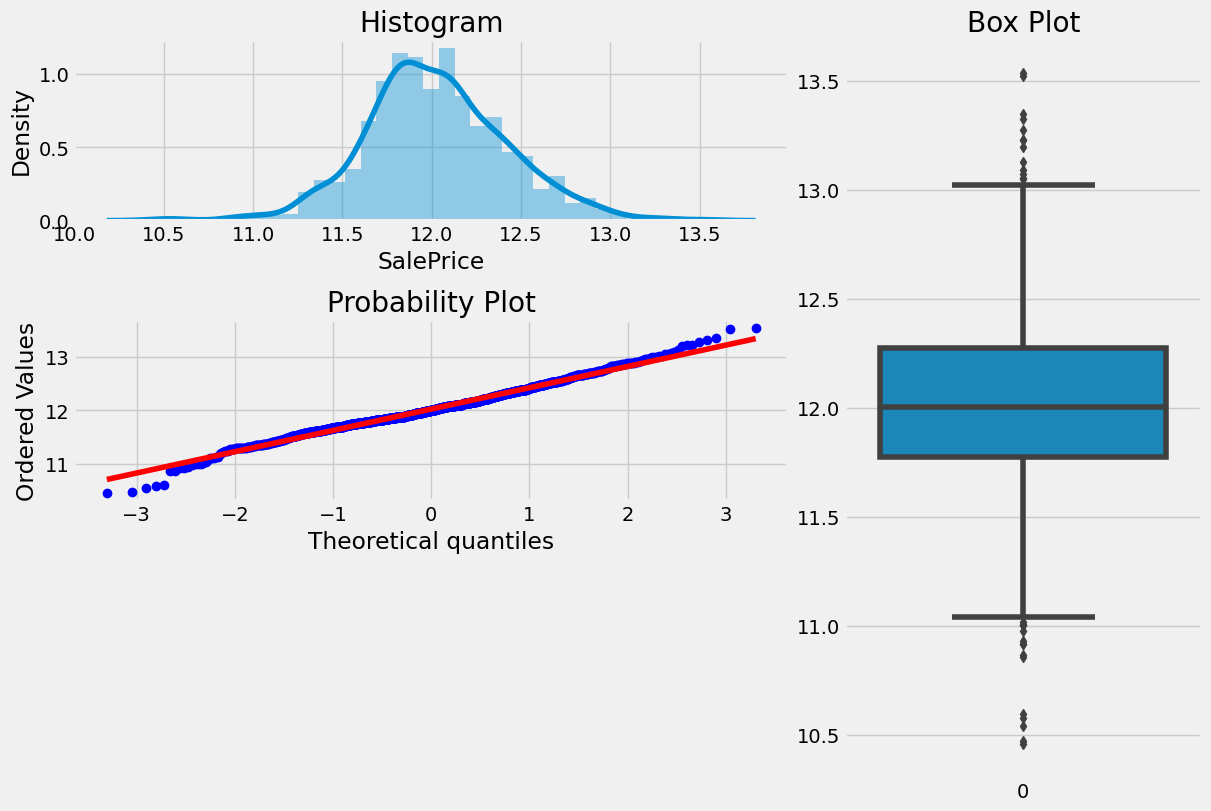

In [67]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules.
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

plotting_3_chart(df_train, 'SalePrice')

In [68]:
#skewness and kurtosis
print("Skewness: " + str(df_train['SalePrice'].skew()))
print("Kurtosis: " + str(df_train['SalePrice'].kurt()))

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


In [69]:
## Getting the correlation of all the features with target variable.
(df_train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual     0.667790
Neighborhood    0.547561
GrLivArea       0.533272
GarageCars      0.463250
ExterQual       0.460824
                  ...   
Id              0.000322
Utilities       0.000160
BsmtHalfBath    0.000027
BsmtFinSF2      0.000023
PoolQC               NaN
Name: SalePrice, Length: 83, dtype: float64

## **SalePrice vs OverallQual**

In [70]:
def customized_scatterplot(y, x):
        ## Sizing the plot.
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

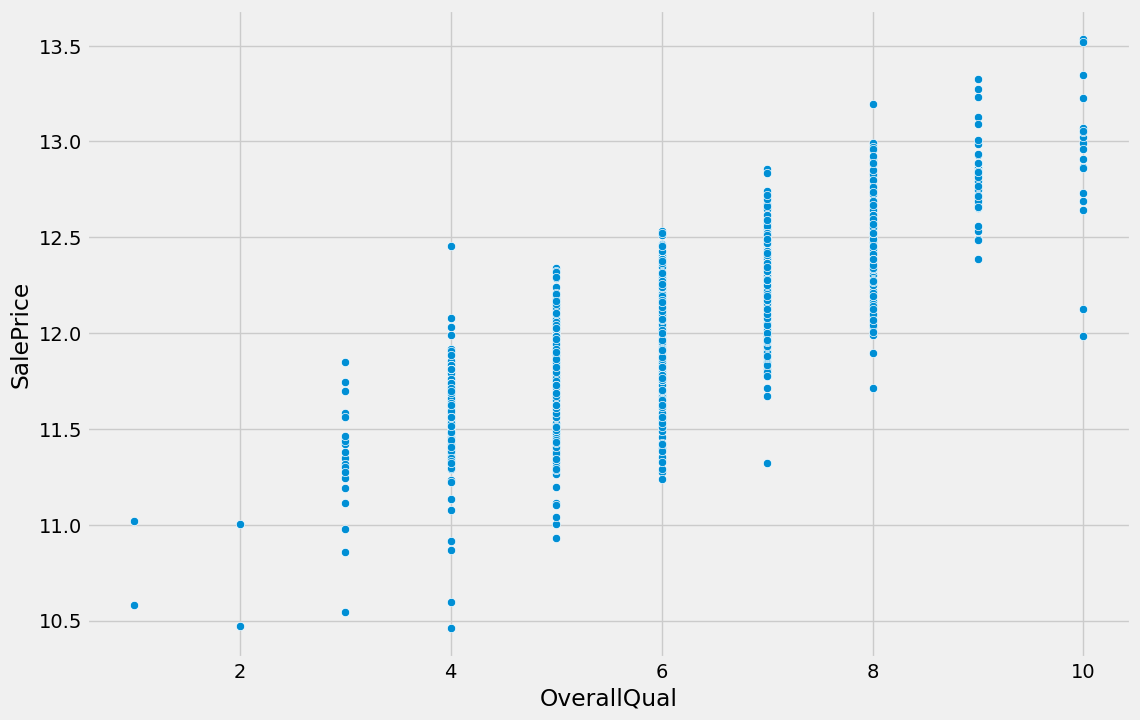

In [71]:
customized_scatterplot(df_train.SalePrice,df_train.OverallQual)

As we can see, there are two outliers in the plot above. We will get rid off them later. Let's look at another scatter plot with a different feature.

## **SalePrice vs GarageArea**

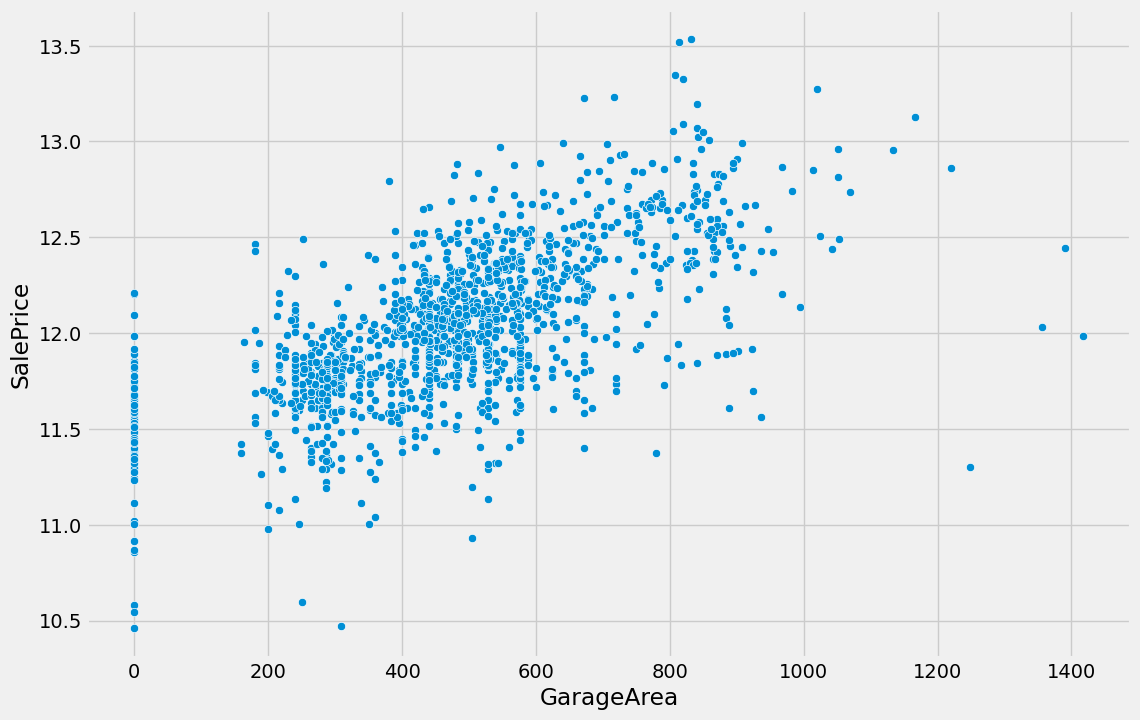

In [72]:
customized_scatterplot(df_train.SalePrice, df_train.GarageArea);

## **SalePrice vs TotalBsmtSF**

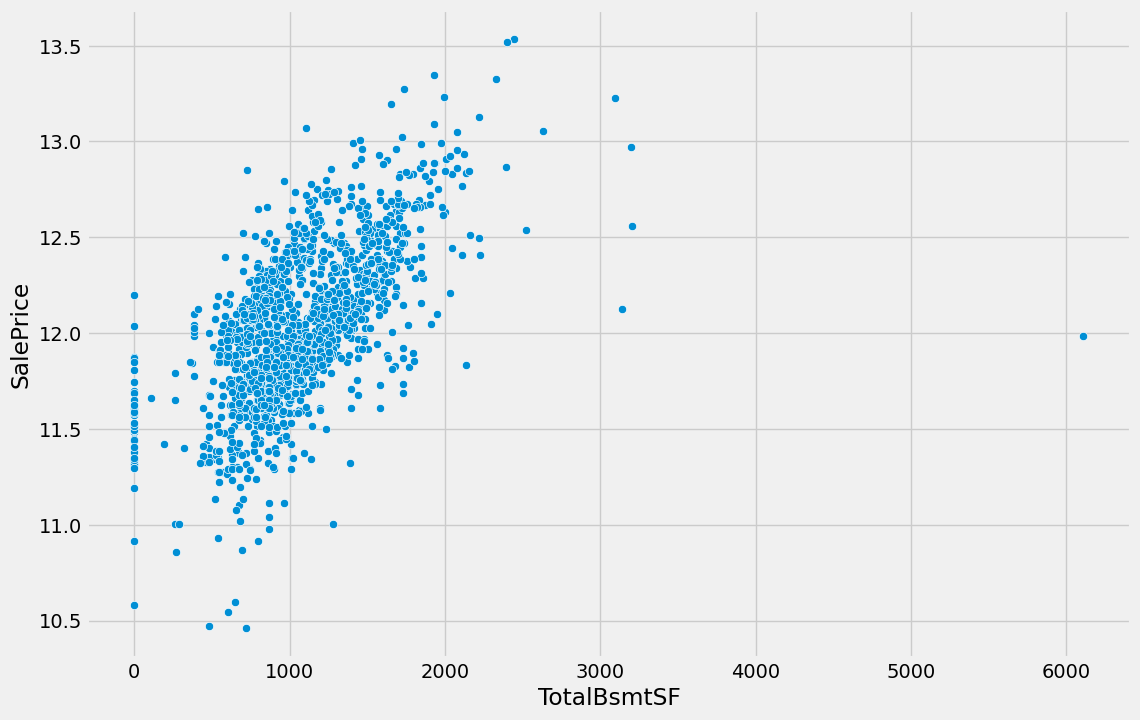

In [73]:
customized_scatterplot(df_train.SalePrice, df_train.TotalBsmtSF)

## **SalePrice vs 1stFlrSF**

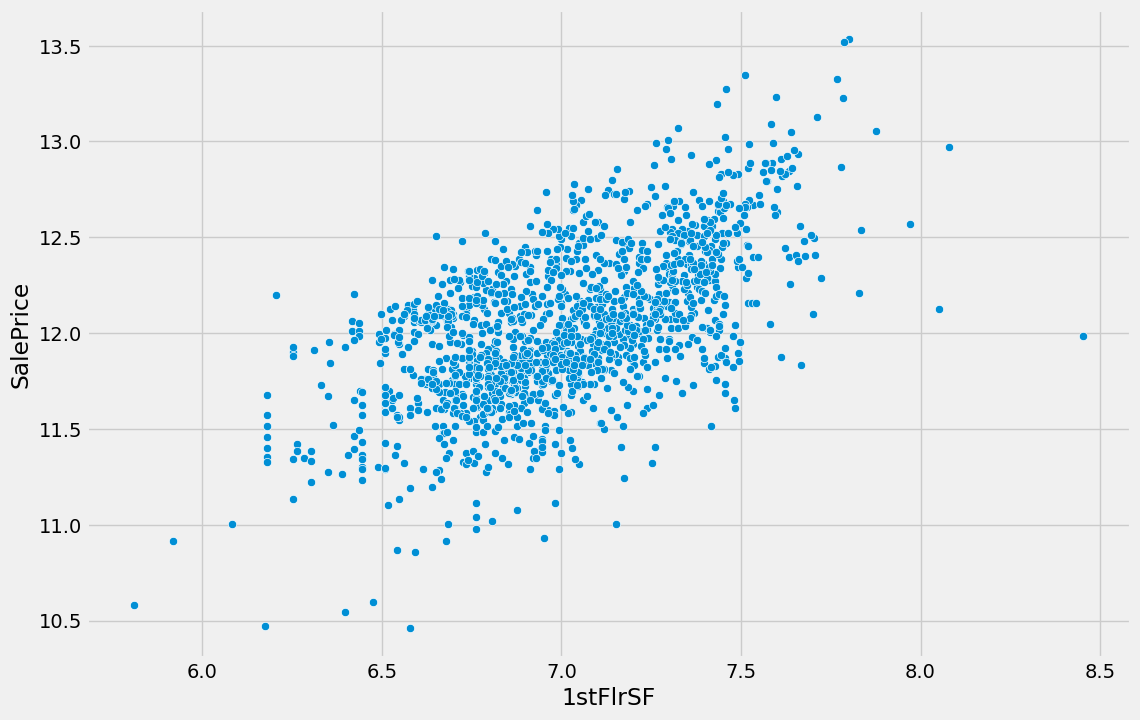

In [74]:
customized_scatterplot(df_train.SalePrice, df_train['1stFlrSF']);

## **SalePrice vs MasVnrArea**

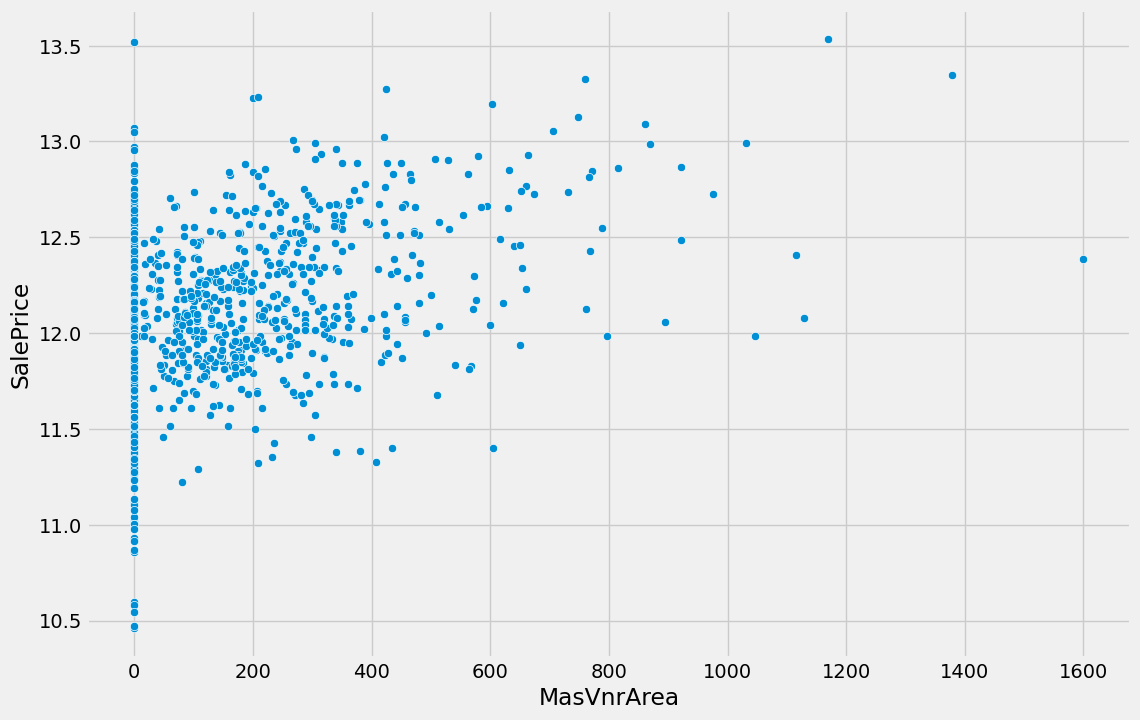

In [75]:
customized_scatterplot(df_train.SalePrice, df_train.MasVnrArea);

In [76]:

## Deleting those two values with outliers.
df_train = df_train[df_train.GrLivArea < 4500]
df_train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = df_train.copy()

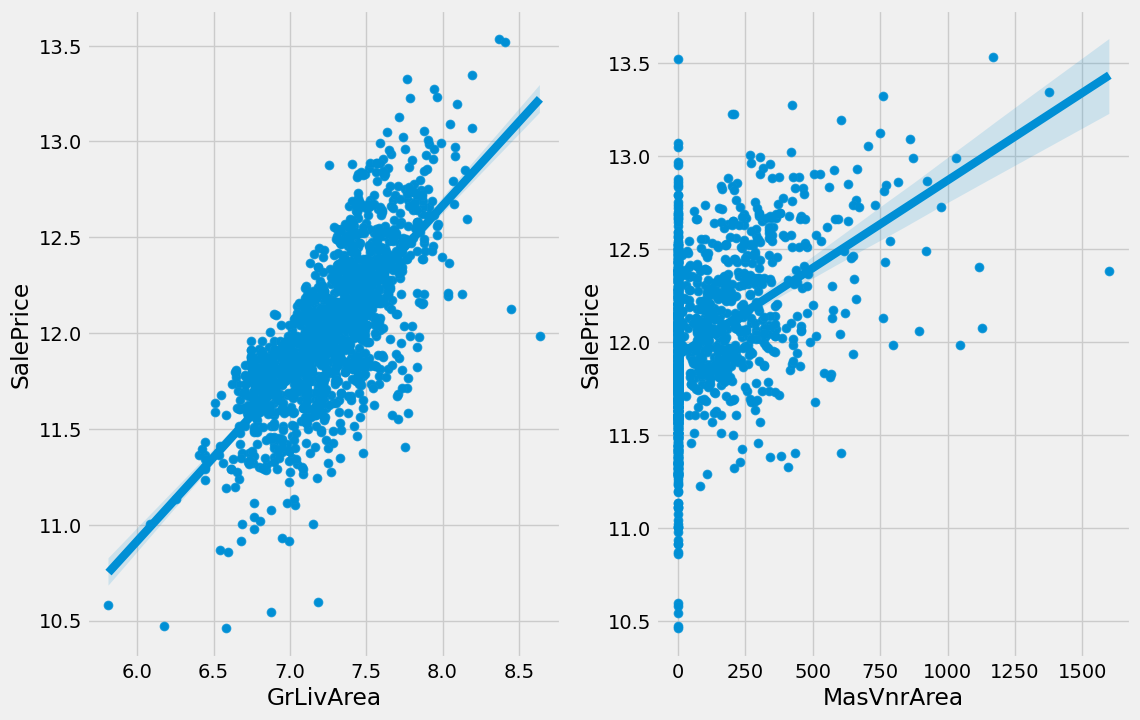

In [77]:
## Plot sizing.
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea.
sns.scatterplot( x = df_train.GrLivArea, y = df_train.SalePrice,  ax=ax1)
## Putting a regression line.
sns.regplot(x=df_train.GrLivArea, y=df_train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea.
sns.scatterplot(x = df_train.MasVnrArea,y = df_train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice.
sns.regplot(x=df_train.MasVnrArea, y=df_train.SalePrice, ax=ax2);

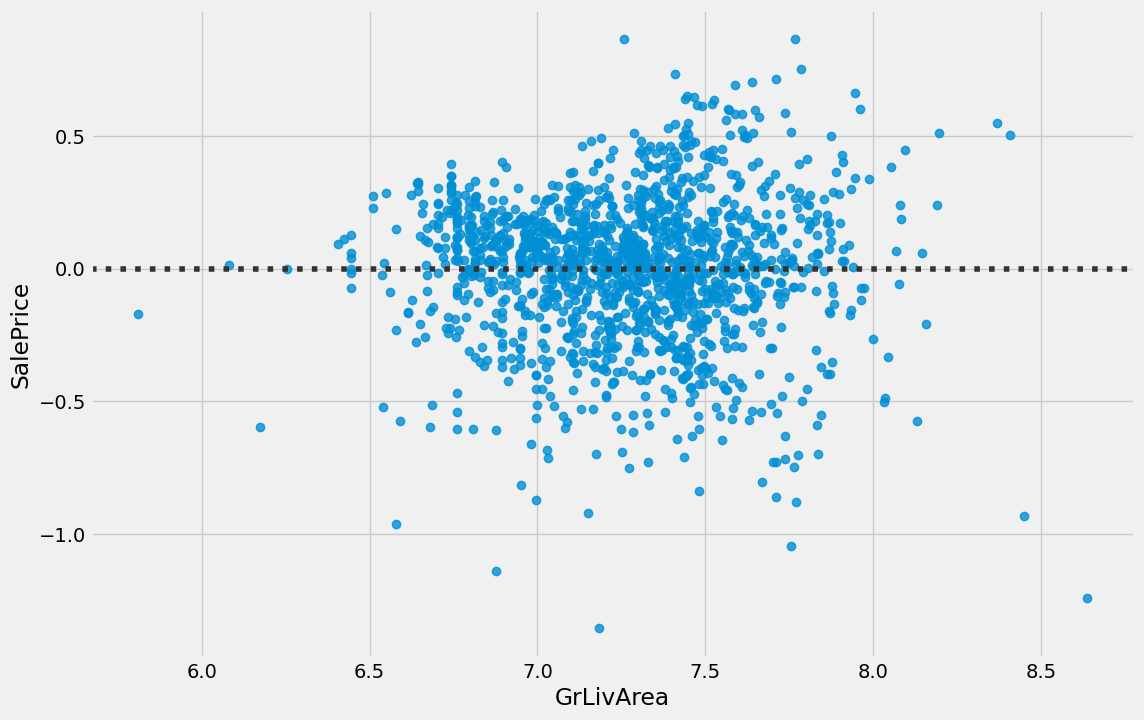

In [78]:
plt.subplots(figsize = (12,8))
sns.residplot(x=df_train.GrLivArea, y=df_train.SalePrice);

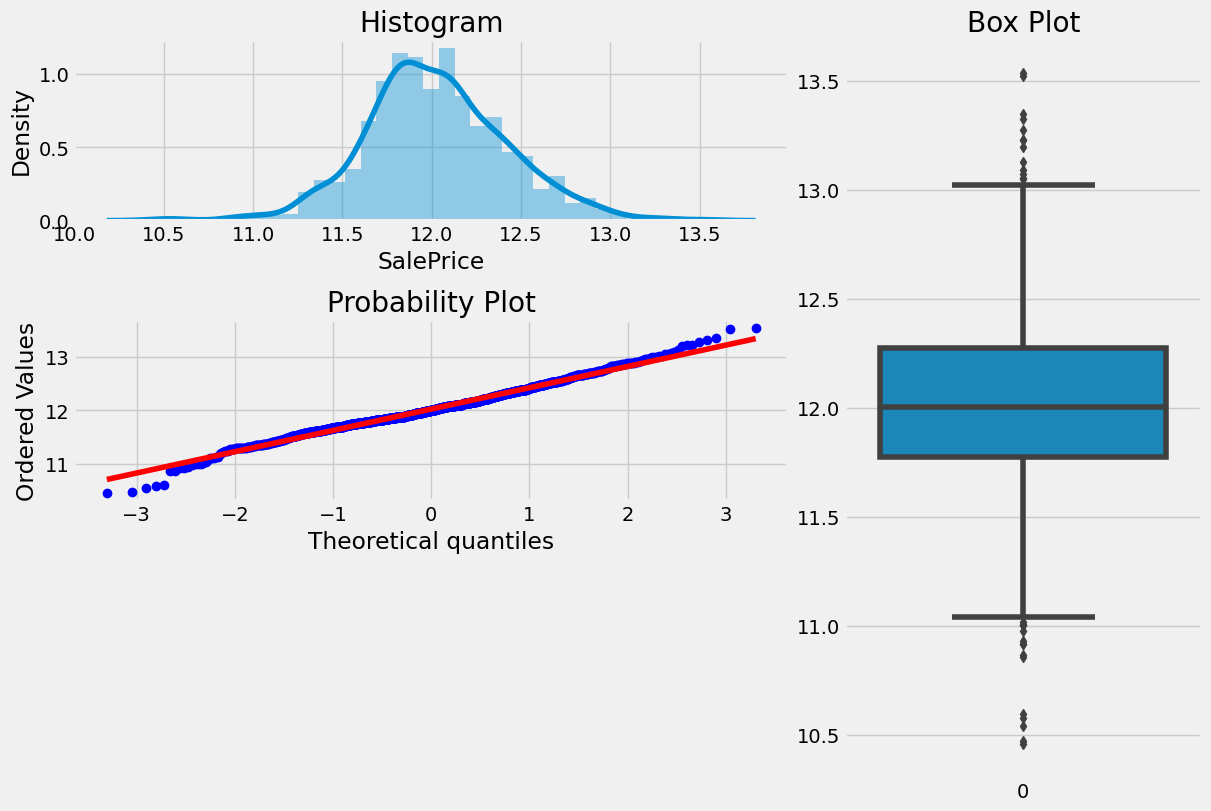

In [79]:
plotting_3_chart(df_train, 'SalePrice')

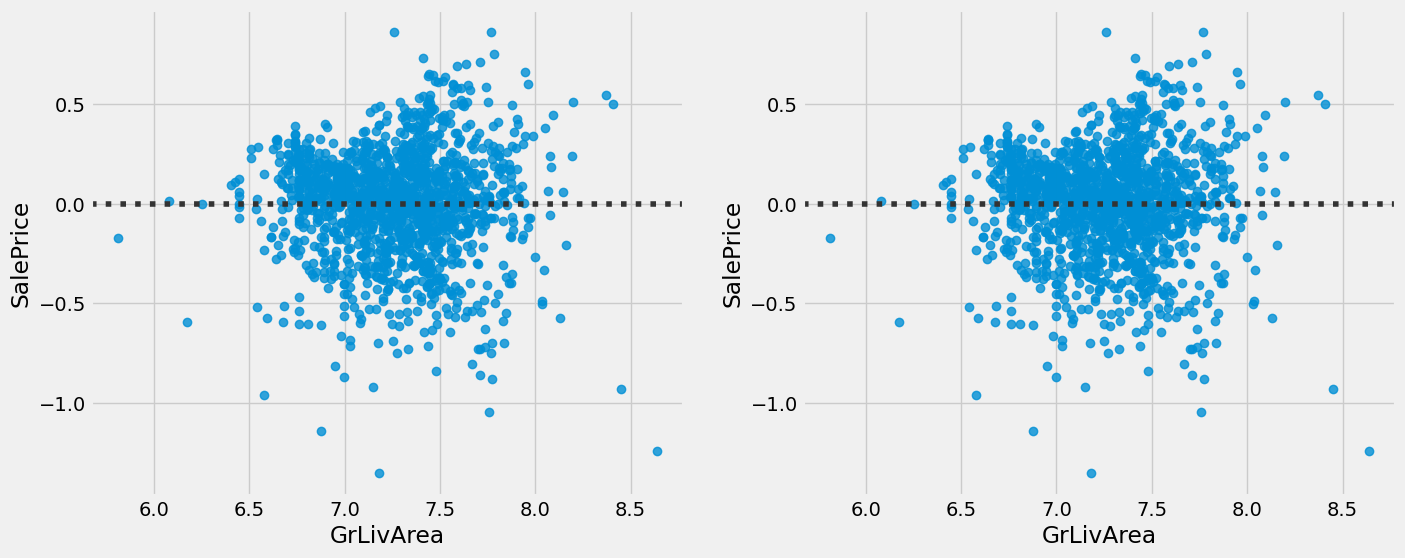

In [80]:
## Customizing grid for two plots.
fig, (ax1, ax2) = plt.subplots(figsize = (15,6),
                               ncols=2,
                               sharey = False,
                               sharex=False
                              )
## doing the first scatter plot.
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice.
sns.residplot(x =df_train.GrLivArea, y = df_train.SalePrice, ax = ax2);

## **Creating New Features**

In [81]:
# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = (all_data['TotalBsmtSF']
                       + all_data['1stFlrSF']
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1']
                                 + all_data['BsmtFinSF2']
                                 + all_data['1stFlrSF']
                                 + all_data['2ndFlrSF']
                                )


all_data['Total_Bathrooms'] = (all_data['FullBath']
                               + (0.5 * all_data['HalfBath'])
                               + all_data['BsmtFullBath']
                               + (0.5 * all_data['BsmtHalfBath'])
                              )


all_data['Total_porch_sf'] = (all_data['OpenPorchSF']
                              + all_data['3SsnPorch']
                              + all_data['EnclosedPorch']
                              + all_data['ScreenPorch']
                              + all_data['WoodDeckSF']
                             )




In [82]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [83]:
all_data.shape

(2919, 90)

## **Deleting Features**

In [84]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

## **Creating Dummy Variables**.


In [85]:
## Creating dummy variable
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2919, 335)

In [86]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [87]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [88]:
counts = X.BsmtUnfSF.value_counts()

In [89]:
counts.iloc[0]

117

In [90]:
for i in X.columns:
    counts = X[i].value_counts()
    print (counts)

Id
1       1
982     1
980     1
979     1
978     1
       ..
487     1
486     1
485     1
484     1
1460    1
Name: count, Length: 1455, dtype: int64
LotFrontage
60.0     142
70.0      70
80.0      69
50.0      56
75.0      53
        ... 
150.0      1
141.0      1
112.0      1
33.0       1
46.0       1
Name: count, Length: 132, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
10800    14
         ..
1526      1
9490      1
15578     1
5784      1
9717      1
Name: count, Length: 1069, dtype: int64
OverallQual
5     396
6     374
7     318
8     167
4     115
9      43
3      19
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    818
6    252
7    205
8     72
4     56
3     25
9     22
2      4
1      1
Name: count, dtype: int64
YearBuilt
2006    66
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64
YearRemodAdd
1950    177
2006     96
2007     

In [91]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [92]:
X.shape,y.shape, X_sub.shape

((1455, 334), (1455,), (1459, 334))

# **Modeling the Data**

In [93]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974, 334), (974,), (481, 334), (481,))

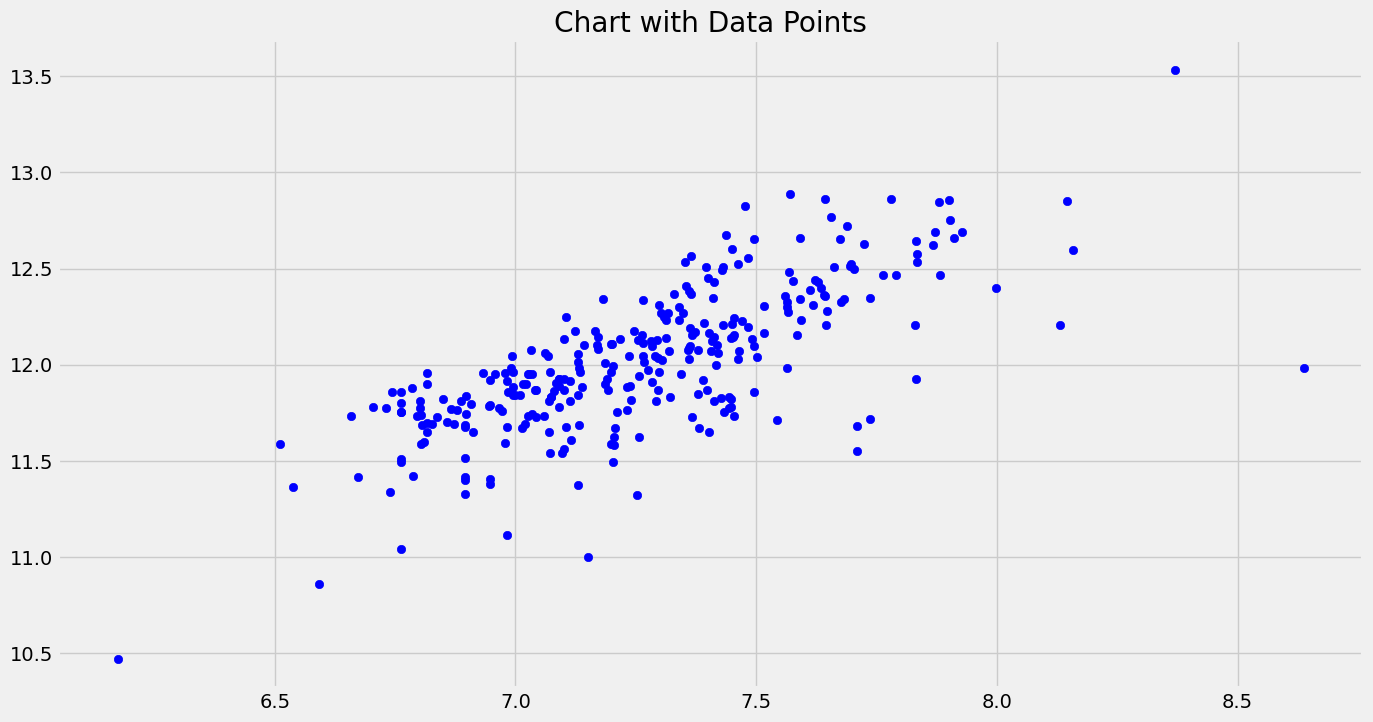

In [95]:
sample_train = previous_train.sample(300)
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
plt.title("Chart with Data Points");
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
#ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');

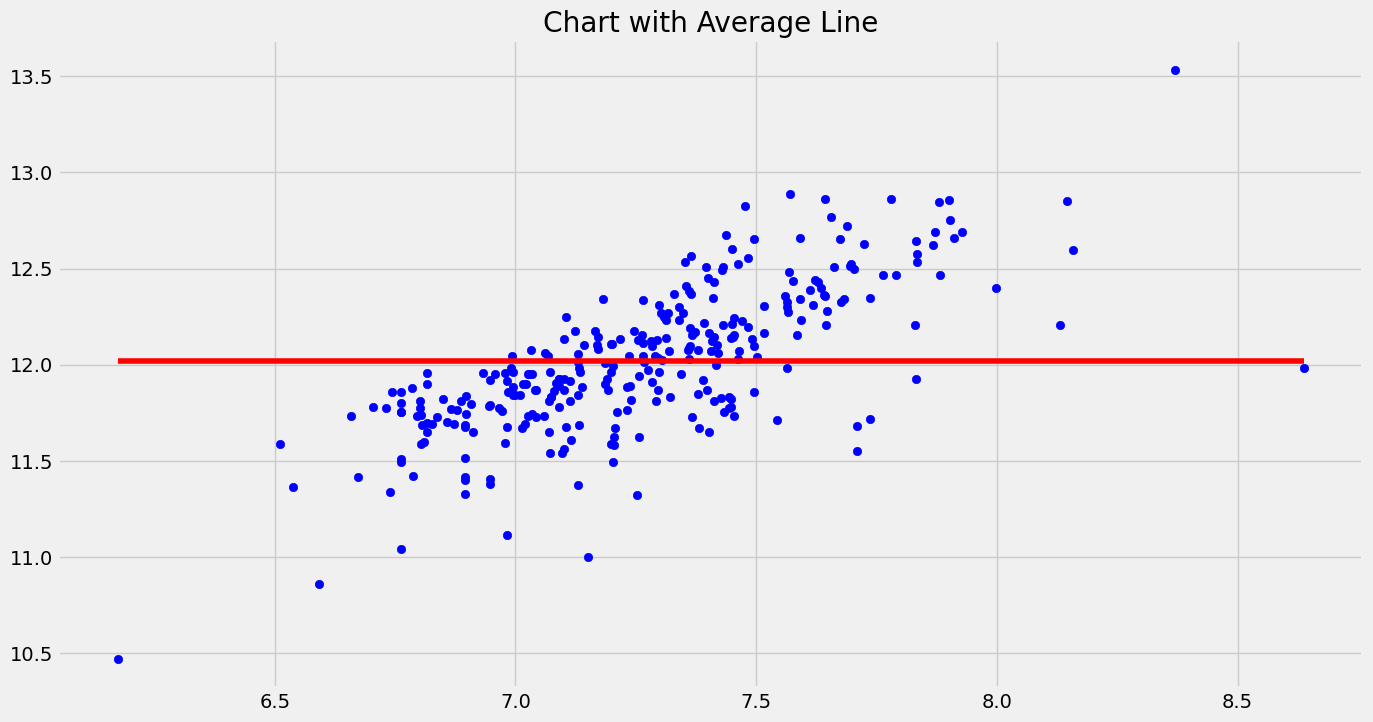

In [96]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [97]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 0.1430678711708614


In [98]:
## Calculating the beta coefficients by hand.
## mean of y.
y_bar = sample_train.SalePrice.mean()
## mean of x.
x_bar = sample_train.GrLivArea.mean()
## Std of y
std_y = sample_train.SalePrice.std()
## std of x
std_x = sample_train.GrLivArea.std()
## correlation of x and y
r_xy = sample_train.corr().loc['GrLivArea','SalePrice']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

In [99]:
## getting y_hat, which is the predicted y values.
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['GrLivArea']

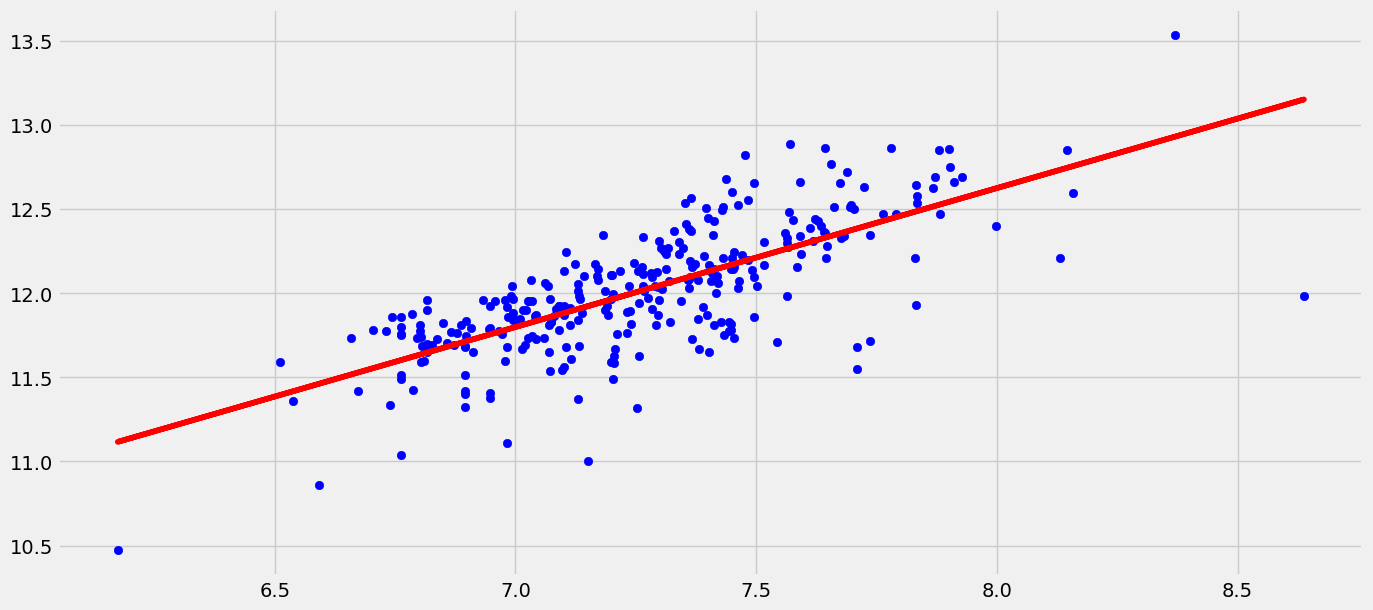

In [100]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c='b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='r');

In [101]:
## getting mse
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['SalePrice'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 0.06581593258286468


In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train['SalePrice'], sample_train.Linear_Yhat)

0.06581593258286468

A much-anticipated decrease in mean squared error(mse), therefore better-predicted model. The way we compare between the two predicted lines is by considering their errors. Let's put both of the model's side by side and compare the errors.

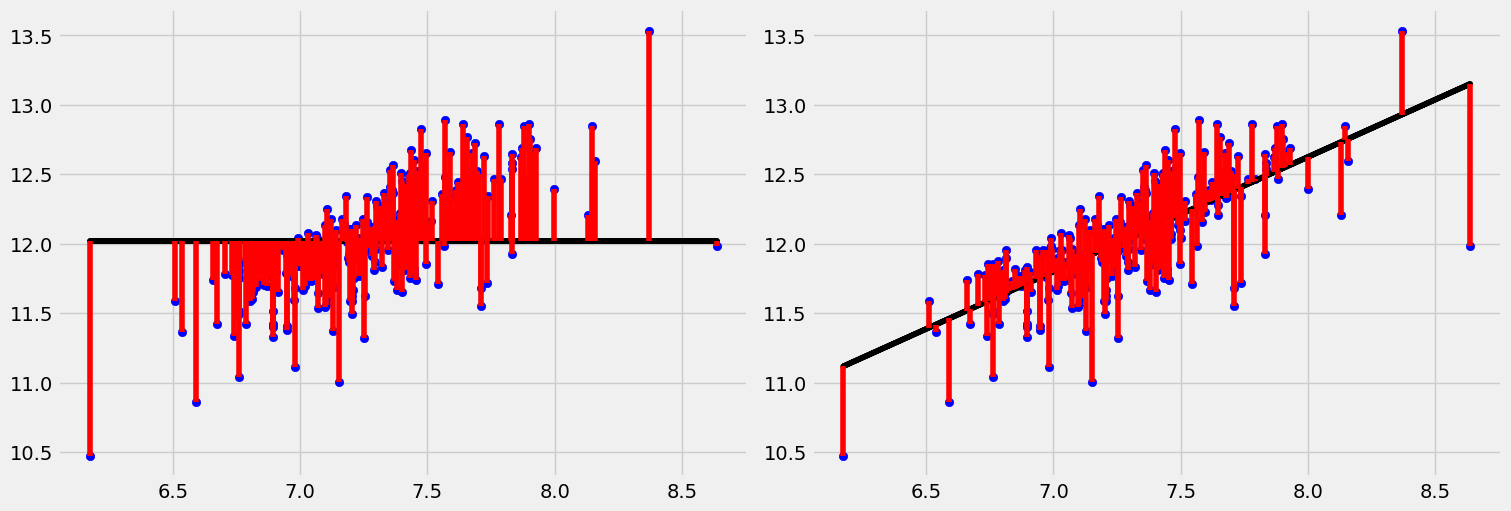

In [103]:
## Creating a customized chart. and giving in figsize and everything.
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows.
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax1.plot(sample_train['GrLivArea'], sample_train['mean_sale_price'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['mean_sale_price']), 'r-')

ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax2.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['Linear_Yhat']), 'r-')

# **Modeling(Linear Regression,Ridge,Lasso,RandomForest,GradientBoosting)**

In [104]:
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Linear Regression**

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('MAE ',mean_absolute_error(y_test, y_pred))
print('MSE',mean_squared_error(y_test, y_pred))
print('R2 Score',r2_score(y_test, y_pred))
from math import sqrt
print("RMSE of Linear Regression Model ",sqrt(mean_squared_error(y_test, y_pred)))

MAE  0.08953435175705218
MSE 0.016001439210504325
R2 Score 0.9056775659438655
RMSE of Linear Regression Model  0.12649679525784172


## **Ridge Regression**

In [108]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_rg = ridge_model.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('MAE ',mean_absolute_error(y_test, y_pred_rg))
print('MSE',mean_squared_error(y_test, y_pred_rg))
print('R2 Score',r2_score(y_test, y_pred_rg))
from math import sqrt
print("RMSE of Ridge Regression Model ",sqrt(mean_squared_error(y_test, y_pred_rg)))


MAE  0.08887558276372591
MSE 0.015867230024347017
R2 Score 0.9064686783522257
RMSE of Ridge Regression Model  0.12596519370185963


## **Lasso Regression**

In [110]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_ls = lasso_model.predict(X_test)

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('MAE ',mean_absolute_error(y_test, y_pred_ls))
print('MSE',mean_squared_error(y_test, y_pred_ls))
print('R2 Score',r2_score(y_test, y_pred_ls))
from math import sqrt
print("RMSE of Lasso Regression Model ",sqrt(mean_squared_error(y_test, y_pred_ls)))


MAE  0.13321899007955593
MSE 0.03806367513844544
R2 Score 0.7756290268050838
RMSE of Lasso Regression Model  0.19509914181883384


## **GradientBoosting**

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_y_pred =gb.predict(X_test)

In [113]:
gb_y_pred = gb.predict(X_test)
from sklearn.metrics import r2_score
print('MAE',mean_absolute_error(y_test, gb_y_pred))
print('MSE',mean_squared_error(y_test, gb_y_pred))
print('R2_Score', r2_score(y_test, gb_y_pred))
from math import sqrt
print("RMSE of Gradientboost Model is ",sqrt(mean_squared_error(y_test, gb_y_pred)))


MAE 0.08376554836519744
MSE 0.015294489966723593
R2_Score 0.9098447644408463
RMSE of Gradientboost Model is  0.12367089377344855


## **RandomForest**

In [114]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)

RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [115]:
rf_y_pred = RFregressor.predict(X_test)
print('MAE',mean_absolute_error(y_test, rf_y_pred))
print('MSE',mean_squared_error(y_test, rf_y_pred))
print('R2_Score',r2_score(y_test, rf_y_pred))
from math import sqrt
print("RMSE of RandomForest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))


MAE 0.08869703855075757
MSE 0.017377032803731277
R2_Score 0.8975689618190557
RMSE of RandomForest Regression Model is  0.13182197390318232


### **The Machine Learning Algorithm that perform the best was GradientBoostRegressor (MAE=0.08,MSE=0.014,R2_Score=0.91,RMSE=0.12)**

In [116]:
## Submission
test_pred = gb.predict(X_test)
submission = pd.DataFrame(X_test['Id'])
test_pred= np.expm1(test_pred )
submission['SalePrice'] = test_pred
submission.head()

Id      SalePrice
892    893  142919.623469
1105  1106  328655.662935
413    414  115989.137890
522    523  140370.933211
1036  1037  321972.667864